# CLEANING AND ADDING COLUMNS

imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('vaccine_data.xlsx')
drop = ['Note','P1Com','P2Com','P3Com','Parents','CeCo']
df.drop(columns=drop, inplace=True)

convert "Attended" columns to datetime and make sure "NO SHOW" columns do not have NaT

In [3]:
df['Att1'] = pd.to_datetime(df['Att1'], errors='coerce')
df['Att2'] = pd.to_datetime(df['Att2'], errors='coerce')
df['Att3'] = pd.to_datetime(df['Att3'], errors='coerce')
df['Att4'] = pd.to_datetime(df['Att4'], errors='coerce')
df['Att5'] = pd.to_datetime(df['Att5'], errors='coerce')
df['DoB'] = pd.to_datetime(df['DoB'], errors='coerce')
# df['CeDB'] = pd.to_datetime(df['CeDB'], errors='coerce')
for idx, row in df.iterrows():
    if row['ReNu'] == 'NO SHOW':
        df.at[idx, 'Att1'] = 'NO SHOW'
        df.at[idx, 'Att2'] = 'NO SHOW'
        df.at[idx, 'Att3'] = 'NO SHOW'
        df.at[idx, 'Att4'] = 'NO SHOW'
        df.at[idx, 'Att5'] = 'NO SHOW'
        df.at[idx, 'ReDB'] = 'NO SHOW'
df['Att1'].fillna('None', inplace=True)
df['Att2'].fillna('None', inplace=True)
df['Att3'].fillna('None', inplace=True)
df['Att4'].fillna('None', inplace=True)
df['Att5'].fillna('None', inplace=True)

make one DOB column

In [4]:
# DOBs = []
# for idx, row in df.iterrows():
#     if df.at[idx, 'ReDB'] != 'NO SHOW':
#         date = df.at[idx, 'ReDB']
#         DOBs.append(date)
#     else:
#         date = df.at[idx, 'CeDB']
#         DOBs.append(date)
# df['DOB'] = DOBs


age column

In [5]:
dates = []

for idx, row in df.iterrows():
    if row['Att1'] == 'NO SHOW':
        dates.append(pd.to_datetime('3/15/2023'))
        continue
    if row['Att1'] == pd.to_datetime('3/15/2023'):
        dates.append(pd.to_datetime('3/15/2023'))
        continue
    if row['Att2'] == pd.to_datetime('4/15/2023'):
        dates.append(pd.to_datetime('4/15/2023'))
        continue
    if row['Att3'] == pd.to_datetime('5/15/2023'):
        dates.append(pd.to_datetime('5/15/2023'))
        continue
    if row['Att4'] == pd.to_datetime('6/15/2023'):
        dates.append(pd.to_datetime('6/15/2023'))
        continue
    if row['Att5'] == pd.to_datetime('7/15/2023'):
        dates.append(pd.to_datetime('7/15/2023'))
        continue

df['dates'] = dates
ages = list(df['dates'] - df['DoB'])
df['AGE'] = ages
df['AGE'] = df['AGE'].dt.days / 30
df.drop(columns=['dates'], inplace=True)

PreV column

In [6]:
preV_P = []
for idx, row in df.iterrows():
    if row['ReNu'] == 'NO SHOW':
        preV_P.append('?')
        continue
    count = 0
    for col in df.columns:
        if row[col] == 'P':
            count = count + 1
    if count >= 1:
        preV_P.append('Yes')
    else:
        preV_P.append('No')
df['PreV'] = preV_P

UTD column

In [7]:
penta_cols = ['P1Pe3','P2Pe3','P3Pe3','P4Pe3', 'P5Pe3']
polio_cols = ['P1Po3','P2Po3','P3Po3','P4Po3', 'P5Po3']
utd = []
for idx, row in df.iterrows():
    if row['ReNu'] == 'NO SHOW':
        utd.append('?')
        continue
    UTD_Pe = False
    UTD_Po = False
    while not UTD_Pe and not UTD_Po:
        for col in penta_cols:
            if row[col] == 'Yes' or row[col] == 'P':
                UTD_Pe = True
        for col2 in polio_cols:
            if row[col2] == 'Yes' or row[col2] == 'P':
                UTD_Po = True
        utd.append(UTD_Pe and UTD_Po)
        if not UTD_Pe and not UTD_Po:
            break
df['UTD'] = utd

insert "-" if the child did not attend on that date

In [8]:
for idx, row in df.iterrows():
    if row['Att1'] == 'None': # first came in Apr/May/June
        #print(7)
        df.at[idx, 'P1BC'] = '-'
        df.at[idx, 'P1Po1'] = '-'
        df.at[idx, 'P1Po2'] = '-'
        df.at[idx, 'P1Po3'] = '-'
        df.at[idx, 'P1Pe1'] = '-'
        df.at[idx, 'P1Pe2'] = '-'
        df.at[idx, 'P1Pe3'] = '-'
        df.at[idx, 'P1M1'] = '-'
        df.at[idx, 'P1M2'] = '-'
    if (row['Att2'] == 'None') and (row['Att1'] == 'None'): # first came in May/June
        df.at[idx, 'P2BC'] = '-'
        df.at[idx, 'P2Po1'] = '-'
        df.at[idx, 'P2Po2'] = '-'
        df.at[idx, 'P2Po3'] = '-'
        df.at[idx, 'P2Pe1'] = '-'
        df.at[idx, 'P2Pe2'] = '-'
        df.at[idx, 'P2Pe3'] = '-'
        df.at[idx, 'P2M1'] = '-'
        df.at[idx, 'P2M2'] = '-'
    if (row['Att3'] == 'None') and (row['Att1'] == 'None') and (row['Att2'] == 'None'): # first came in June
        df.at[idx, 'P3BC'] = '-'
        df.at[idx, 'P3Po1'] = '-'
        df.at[idx, 'P3Po2'] = '-'
        df.at[idx, 'P3Po3'] = '-'
        df.at[idx, 'P3Pe1'] = '-'
        df.at[idx, 'P3Pe2'] = '-'
        df.at[idx, 'P3Pe3'] = '-'
        df.at[idx, 'P3M1'] = '-'
        df.at[idx, 'P3M2'] = '-'
    if (row['Att4'] == 'None' ) and (row['Att3'] == 'None') and (row['Att1'] == 'None') and (row['Att2'] == 'None'): # first came in July
        df.at[idx, 'P4BC'] = '-'
        df.at[idx, 'P4Po1'] = '-'
        df.at[idx, 'P4Po2'] = '-'
        df.at[idx, 'P4Po3'] = '-'
        df.at[idx, 'P4Pe1'] = '-'
        df.at[idx, 'P4Pe2'] = '-'
        df.at[idx, 'P4Pe3'] = '-'
        df.at[idx, 'P4M1'] = '-'
        df.at[idx, 'P4M2'] = '-'

In [9]:
df['UTD'] = df['UTD'].replace(True,'Yes')
df['UTD'] = df['UTD'].replace(False, 'No')

Age columns at different months

In [10]:
age_apr15 = []
for idx, row in df.iterrows():
    if row['Att1'] == pd.to_datetime('3/15/2023'):
        age_apr15.append(row['AGE'] + 1)
        continue
    if row['Att2'] == pd.to_datetime('4/15/2023'):
        age_apr15.append(row['AGE'])
        continue
    if row['Att3'] == pd.to_datetime('5/15/2023'):
        age_apr15.append(row['AGE'] - 1)
        continue
    if row['Att1'] == 'NO SHOW':
        age_apr15.append(row['AGE'] + 1)
        continue
    if row['Att4'] == pd.to_datetime('6/15/2023'):
        age_apr15.append(row['AGE'] - 2)
        continue
    if row['Att5'] == pd.to_datetime('7/15/2023'): # first came in July
        age_apr15.append(row['AGE'] - 3)
        continue
age_may15 = []
for idx, row in df.iterrows():
    if row['Att1'] == pd.to_datetime('3/15/2023'):
        age_may15.append(row['AGE'] + 2)
        continue
    if row['Att1'] == 'NO SHOW':
        age_may15.append(row['AGE'] + 2)
    if row['Att2'] == pd.to_datetime('4/15/2023'):
        age_may15.append(row['AGE'] + 1)
        continue
    if row['Att3'] == pd.to_datetime('5/15/2023'):
        age_may15.append(row['AGE'])
        continue
    if row['Att4'] == pd.to_datetime('6/15/2023'):
        age_may15.append(row['AGE'] - 1)
        continue
    if row['Att5'] == pd.to_datetime('7/15/2023'):
        age_may15.append(row['AGE'] - 2)
        continue
age_june15 = []
for idx, row in df.iterrows():
    if row['Att1'] == pd.to_datetime('3/15/2023'):
        age_june15.append(row['AGE'] + 3)
        continue
    if row['Att1'] == 'NO SHOW':
        age_june15.append(row['AGE'] + 3)
    if row['Att2'] == pd.to_datetime('4/15/2023'):
        age_june15.append(row['AGE'] + 2)
        continue
    if row['Att3'] == pd.to_datetime('5/15/2023'):
        age_june15.append(row['AGE'] + 1)
        continue
    if row['Att4'] == pd.to_datetime('6/15/2023'):
        age_june15.append(row['AGE'])
        continue
    if row['Att5'] == pd.to_datetime('7/15/2023'):
        age_june15.append(row['AGE'] - 1)
        continue
age_july15 = []
for idx, row in df.iterrows():
    if row['Att1'] == pd.to_datetime('3/15/2023'):
        age_july15.append(row['AGE'] + 4)
        continue
    if row['Att1'] == 'NO SHOW':
        age_july15.append(row['AGE'] + 4)
    if row['Att2'] == pd.to_datetime('4/15/2023'):
        age_july15.append(row['AGE'] + 3)
        continue
    if row['Att3'] == pd.to_datetime('5/15/2023'):
        age_july15.append(row['AGE'] + 2)
        continue
    if row['Att4'] == pd.to_datetime('6/15/2023'):
        age_july15.append(row['AGE']+ 1)
        continue
    if row['Att5'] == pd.to_datetime('7/15/2023'):
        age_july15.append(row['AGE'])
        continue

df['AGE_APR15'] = age_apr15
df['AGE_MAY15'] = age_may15
df['AGE_JUNE15'] = age_june15
df['AGE_JULY15'] = age_july15


In [11]:
no = df.loc[df['PreV']=='No',:]
no['AGE'].median()
np.quantile(a=no['AGE'], q=0.75) - np.quantile(a=no['AGE'], q=0.25)

6.466666666666667

In [18]:
pop = df.loc[(df['PreV']=='No')&(df['AGE_MAY15']>=2)&(df['IDP']=='Yes'), :] # 49
pop.loc[pop['P5Po3']=='Yes', :]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
15,16,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မောင်ဘရူနိုပေါလ်,M,2022-10-14,...,Yes,Yes,Yes,No,NaN,5.066667,6.066667,7.066667,8.066667,9.066667
16,17,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မမေရီဦး,F,2022-05-11,...,Yes,Yes,Yes,Yes,NaN,10.266667,11.266667,12.266667,13.266667,14.266667
17,18,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မအက်စတာမိုး,F,2022-04-21,...,Yes,Yes,Yes,Yes,NaN,10.933333,11.933333,12.933333,13.933333,14.933333
19,20,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မောင်ကောင်းထက်,M,2022-10-16,...,Yes,Yes,Yes,No,NaN,5.000000,6.000000,7.000000,8.000000,9.000000
24,25,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မထရေးဇာ,F,2022-05-21,...,Yes,Yes,Yes,Yes,NaN,9.933333,10.933333,11.933333,12.933333,13.933333
26,27,2023-03-15 00:00:00,None,None,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မဒေါရစ်,F,2023-03-01,...,Yes,Yes,No,No,NaN,0.466667,1.466667,2.466667,3.466667,4.466667
27,28,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ဂျူးနီယို,M,2022-05-18,...,Yes,Yes,Yes,Yes,NaN,10.033333,11.033333,12.033333,13.033333,14.033333
28,29,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မောင်ခရစ္စတိုစတုန်း,M,2022-09-13,...,Yes,Yes,Yes,Yes,NaN,6.100000,7.100000,8.100000,9.100000,10.100000
29,30,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ဂျက်စတင်း,M,2022-04-15,...,Yes,Yes,Yes,Yes,NaN,11.133333,12.133333,13.133333,14.133333,15.133333
32,33,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မမယ်ရီလင်း(ဟယ်လီးနာ),F,2022-08-18,...,Yes,Yes,Yes,No,NaN,6.966667,7.966667,8.966667,9.966667,10.966667


0.6326530612244898

In [16]:
import numpy as np
cen = df.loc[df['CeNu']!='None', :]
cen.dropna(inplace=True)
cen['AGE'].median()
np.percentile(a=cen['AGE'], q=75) - np.percentile(a=cen['AGE'], q=25)

/var/folders/7y/1xn42rwd5hxgh74ds6lh1rmm0000gn/T/ipykernel_94310/3565680073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cen.dropna(inplace=True)


6.058333333333333

In [24]:
nonidp = df.loc[(df['IDP']=='No')&(df['ReNu']!='NO SHOW')&(df['PreV']=='No'), :]
elg = nonidp.loc[nonidp['AGE_MAY15']>=2, :] # 80 zero-dose non-IDPs eligible for penta and polio
elg.loc[(elg['P5Po3']=='Yes'),:] # 56

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
0,1,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်အာဗေးလယ်,M,2023-02-02,...,Yes,Yes,No,No,NaN,1.366667,2.366667,3.366667,4.366667,5.366667
1,2,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မသူဇာဝင်း,F,2023-01-19,...,Yes,Yes,No,No,NaN,1.833333,2.833333,3.833333,4.833333,5.833333
2,3,2023-03-15 00:00:00,None,None,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မစုစု,F,2022-05-26,...,Yes,Yes,Yes,Yes,NaN,9.766667,10.766667,11.766667,12.766667,13.766667
3,4,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်စတီဗင်,M,2022-12-09,...,Yes,Yes,No,No,NaN,3.200000,4.200000,5.200000,6.200000,7.200000
4,5,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ဂျက်စတင်း,M,2022-06-07,...,Yes,Yes,Yes,Yes,NaN,9.366667,10.366667,11.366667,12.366667,13.366667
5,6,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မဖြူဖြူထွေး,F,2022-06-12,...,Yes,Yes,Yes,Yes,NaN,9.200000,10.200000,11.200000,12.200000,13.200000
6,7,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ထွန်းမောင်,M,2022-05-28,...,Yes,Yes,Yes,Yes,NaN,9.700000,10.700000,11.700000,12.700000,13.700000
7,8,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ခရစ္စတီယားနို,M,2022-04-08,...,Yes,Yes,Yes,Yes,NaN,11.366667,12.366667,13.366667,14.366667,15.366667
8,9,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ရောင်နီဦး,M,2022-06-25,...,Yes,Yes,Yes,Yes,NaN,8.766667,9.766667,10.766667,11.766667,12.766667
9,10,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မဖရန်စ္စစကာ,F,2023-01-28,...,Yes,Yes,No,No,NaN,1.533333,2.533333,3.533333,4.533333,5.533333


In [25]:
45/80

0.5625

In [17]:
df.loc[(df['ReNu']!='NO SHOW')&(df['IDP']=='Yes'),:]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
15,16,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မောင်ဘရူနိုပေါလ်,M,2022-10-14,...,Yes,Yes,Yes,No,NaN,5.066667,6.066667,7.066667,8.066667,9.066667
16,17,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မမေရီဦး,F,2022-05-11,...,Yes,Yes,Yes,Yes,NaN,10.266667,11.266667,12.266667,13.266667,14.266667
17,18,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မအက်စတာမိုး,F,2022-04-21,...,Yes,Yes,Yes,Yes,NaN,10.933333,11.933333,12.933333,13.933333,14.933333
18,19,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,No,မအော်ရီးယာ,F,2022-03-11,...,Yes,No,Yes,Yes,NaN,12.300000,13.300000,14.300000,15.300000,16.300000
19,20,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မောင်ကောင်းထက်,M,2022-10-16,...,Yes,Yes,Yes,No,NaN,5.000000,6.000000,7.000000,8.000000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,None,None,None,None,2023-07-15 00:00:00,No,မောင်သောမတ်စ်,M,2023-01-28,...,No,No,No,No,NaN,5.600000,2.600000,3.600000,4.600000,5.600000
177,178,None,None,None,None,2023-07-15 00:00:00,No,မောင်ဂျက်စတင်း,M,2023-02-17,...,No,No,No,No,NaN,4.933333,1.933333,2.933333,3.933333,4.933333
180,181,None,None,None,None,2023-07-15 00:00:00,No,မောင်ထားရု,M,2023-04-09,...,No,No,No,No,NaN,3.233333,0.233333,1.233333,2.233333,3.233333
182,183,None,None,None,None,2023-07-15 00:00:00,No,မဗျားမြာ,F,2022-11-11,...,No,No,No,No,NaN,8.200000,5.200000,6.200000,7.200000,8.200000


In [34]:
84/153

0.5490196078431373

In [32]:
t = df.loc[(df['AGE']>=4)&(df['AGE']<=12)&(df['ReNu']!='NO SHOW'),:]
t.loc[t['PreV']=='No',:]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
2,3,2023-03-15 00:00:00,None,None,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မစုစု,F,2022-05-26,...,Yes,Yes,Yes,Yes,NaN,9.766667,10.766667,11.766667,12.766667,13.766667
4,5,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ဂျက်စတင်း,M,2022-06-07,...,Yes,Yes,Yes,Yes,NaN,9.366667,10.366667,11.366667,12.366667,13.366667
5,6,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မဖြူဖြူထွေး,F,2022-06-12,...,Yes,Yes,Yes,Yes,NaN,9.200000,10.200000,11.200000,12.200000,13.200000
6,7,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ထွန်းမောင်,M,2022-05-28,...,Yes,Yes,Yes,Yes,NaN,9.700000,10.700000,11.700000,12.700000,13.700000
7,8,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ခရစ္စတီယားနို,M,2022-04-08,...,Yes,Yes,Yes,Yes,NaN,11.366667,12.366667,13.366667,14.366667,15.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,167,None,None,None,None,2023-07-15 00:00:00,No,မောင်ဖဲဘူး,M,2023-01-04,...,No,No,No,No,NaN,6.400000,3.400000,4.400000,5.400000,6.400000
175,176,None,None,None,None,2023-07-15 00:00:00,No,မောင်သားကြီး,M,2023-02-10,...,No,No,No,No,NaN,5.166667,2.166667,3.166667,4.166667,5.166667
176,177,None,None,None,None,2023-07-15 00:00:00,No,မောင်သောမတ်စ်,M,2023-01-28,...,No,No,No,No,NaN,5.600000,2.600000,3.600000,4.600000,5.600000
177,178,None,None,None,None,2023-07-15 00:00:00,No,မောင်ဂျက်စတင်း,M,2023-02-17,...,No,No,No,No,NaN,4.933333,1.933333,2.933333,3.933333,4.933333


In [15]:
df['IDP'].fillna('No', inplace=True)

In [27]:
df.loc[df['IDP']=='Yes',:]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
15,16,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မောင်ဘရူနိုပေါလ်,M,2022-10-14,...,Yes,Yes,Yes,No,NaN,5.066667,6.066667,7.066667,8.066667,9.066667
16,17,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မမေရီဦး,F,2022-05-11,...,Yes,Yes,Yes,Yes,NaN,10.266667,11.266667,12.266667,13.266667,14.266667
17,18,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မအက်စတာမိုး,F,2022-04-21,...,Yes,Yes,Yes,Yes,NaN,10.933333,11.933333,12.933333,13.933333,14.933333
18,19,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,No,မအော်ရီးယာ,F,2022-03-11,...,Yes,No,Yes,Yes,NaN,12.300000,13.300000,14.300000,15.300000,16.300000
19,20,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မောင်ကောင်းထက်,M,2022-10-16,...,Yes,Yes,Yes,No,NaN,5.000000,6.000000,7.000000,8.000000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,None,None,None,None,2023-07-15 00:00:00,No,မောင်သောမတ်စ်,M,2023-01-28,...,No,No,No,No,NaN,5.600000,2.600000,3.600000,4.600000,5.600000
177,178,None,None,None,None,2023-07-15 00:00:00,No,မောင်ဂျက်စတင်း,M,2023-02-17,...,No,No,No,No,NaN,4.933333,1.933333,2.933333,3.933333,4.933333
180,181,None,None,None,None,2023-07-15 00:00:00,No,မောင်ထားရု,M,2023-04-09,...,No,No,No,No,NaN,3.233333,0.233333,1.233333,2.233333,3.233333
182,183,None,None,None,None,2023-07-15 00:00:00,No,မဗျားမြာ,F,2022-11-11,...,No,No,No,No,NaN,8.200000,5.200000,6.200000,7.200000,8.200000


# ANALYSIS

In [29]:
79/253

0.31225296442687744

In [44]:
import numpy
df2 = df.loc[df['PreV']!='?', :]
# df2.drop(labels=215, inplace=True, axis=0)
print(df2['AGE'].median())
print(len(df2))
print(numpy.percentile(a=df2['AGE'], q=75) - numpy.percentile(a=df2['AGE'], q=25))
# cen

6.216666666666667
184
7.2666666666666675


In [21]:
elg = df.loc[(df['PreV']=='No')&(df['AGE_MAY15']>=2)&(df['AGE']<=12)&(df['AGE_JUNE15']>=9),:] # eligible for BCG, Penta, OPV, MMR
elg.loc[(elg['UTD']=='Yes')&(elg['P5M2']=='Yes')&(elg['P5BC']=='Yes'),:] # how many UTD for all four

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
2,3,2023-03-15 00:00:00,None,None,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မစုစု,F,2022-05-26,...,Yes,Yes,Yes,Yes,NaN,9.766667,10.766667,11.766667,12.766667,13.766667
5,6,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မဖြူဖြူထွေး,F,2022-06-12,...,Yes,Yes,Yes,Yes,NaN,9.200000,10.200000,11.200000,12.200000,13.200000
6,7,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ထွန်းမောင်,M,2022-05-28,...,Yes,Yes,Yes,Yes,NaN,9.700000,10.700000,11.700000,12.700000,13.700000
7,8,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ခရစ္စတီယားနို,M,2022-04-08,...,Yes,Yes,Yes,Yes,NaN,11.366667,12.366667,13.366667,14.366667,15.366667
8,9,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ရောင်နီဦး,M,2022-06-25,...,Yes,Yes,Yes,Yes,NaN,8.766667,9.766667,10.766667,11.766667,12.766667
11,12,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ဂျိုးဇက်,M,2022-07-20,...,Yes,Yes,Yes,Yes,NaN,7.933333,8.933333,9.933333,10.933333,11.933333
16,17,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မမေရီဦး,F,2022-05-11,...,Yes,Yes,Yes,Yes,NaN,10.266667,11.266667,12.266667,13.266667,14.266667
17,18,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မအက်စတာမိုး,F,2022-04-21,...,Yes,Yes,Yes,Yes,NaN,10.933333,11.933333,12.933333,13.933333,14.933333
24,25,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မထရေးဇာ,F,2022-05-21,...,Yes,Yes,Yes,Yes,NaN,9.933333,10.933333,11.933333,12.933333,13.933333
27,28,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ဂျူးနီယို,M,2022-05-18,...,Yes,Yes,Yes,Yes,NaN,10.033333,11.033333,12.033333,13.033333,14.033333


In [56]:
mmr = df.loc[(df['PreV']=='No')&(df['AGE_JUNE15']>=9),:]
m = mmr.loc[mmr['Sex']=='M',:] # 31 eligible males
print(len(m))
m.loc[m['P5M2']=='Yes',:] # 27 of eligible females got M2

31


,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
4,5,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ဂျက်စတင်း,M,2022-06-07,...,Yes,Yes,Yes,Yes,NaN,9.366667,10.366667,11.366667,12.366667,13.366667
6,7,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ထွန်းမောင်,M,2022-05-28,...,Yes,Yes,Yes,Yes,NaN,9.700000,10.700000,11.700000,12.700000,13.700000
7,8,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ခရစ္စတီယားနို,M,2022-04-08,...,Yes,Yes,Yes,Yes,NaN,11.366667,12.366667,13.366667,14.366667,15.366667
8,9,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ရောင်နီဦး,M,2022-06-25,...,Yes,Yes,Yes,Yes,NaN,8.766667,9.766667,10.766667,11.766667,12.766667
11,12,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ဂျိုးဇက်,M,2022-07-20,...,Yes,Yes,Yes,Yes,NaN,7.933333,8.933333,9.933333,10.933333,11.933333
27,28,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ဂျူးနီယို,M,2022-05-18,...,Yes,Yes,Yes,Yes,NaN,10.033333,11.033333,12.033333,13.033333,14.033333
28,29,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မောင်ခရစ္စတိုစတုန်း,M,2022-09-13,...,Yes,Yes,Yes,Yes,NaN,6.100000,7.100000,8.100000,9.100000,10.100000
29,30,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ဂျက်စတင်း,M,2022-04-15,...,Yes,Yes,Yes,Yes,NaN,11.133333,12.133333,13.133333,14.133333,15.133333
30,31,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ရိုမားနိုပေါအီ,M,2022-07-05,...,Yes,Yes,Yes,Yes,NaN,8.433333,9.433333,10.433333,11.433333,12.433333
31,32,2023-03-15 00:00:00,2023-04-15 00:00:00,None,None,2023-07-15 00:00:00,No,မောင်သြဂုတ်စတင်း,M,2022-08-01,...,Yes,No,Yes,Yes,NaN,7.533333,8.533333,9.533333,10.533333,11.533333


In [41]:
123/129

0.9534883720930233

In [43]:
g = df.loc[(df['PreV']=='No')&(df['AGE_JUNE15']>=9),:] #  58 eligible for MMR
one = g.loc[g['P5M1']=='Yes',: ] # 55 got MMR1
two = g.loc[g['P5M2']=='Yes', :] # 50 got MMR2
print(len(g))
print(len(one))
print(len(two))

58
55
50


In [27]:
par = df.loc[df['PreV']=='Yes',:]
par.loc[(par['P5M1']=='Yes')|(par['P5M2']=='P'),:]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
44,45,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,Yes,မောင်ဘုန်းမြင့်မြတ်မောင်,M,2022-05-05,...,Yes,No,Yes,Yes,NaN,10.466667,11.466667,12.466667,13.466667,14.466667
46,47,2023-03-15 00:00:00,None,2023-05-15 00:00:00,None,None,Yes,မောင်ဘင်ဂျမင်,M,2022-03-08,...,P,Yes,Yes,Yes,NaN,12.400000,13.400000,14.400000,15.400000,16.400000
51,52,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မအဲလိဇဘက်,F,2021-10-03,...,Yes,Yes,Yes,Yes,NaN,17.600000,18.600000,19.600000,20.600000,21.600000
65,66,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မအယ်နီရှိုင်း,F,2022-03-01,...,Yes,Yes,Yes,Yes,NaN,12.633333,13.633333,14.633333,15.633333,16.633333
67,68,2023-03-15 00:00:00,None,None,None,None,Yes,မောင်လဝန်းကဗျာ,M,2022-08-05,...,P,Yes,Yes,No,NaN,7.400000,8.400000,9.400000,10.400000,11.400000
68,69,2023-03-15 00:00:00,None,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မောင်အောင်ဆန်းလေး,M,2022-08-24,...,Yes,No,Yes,No,NaN,6.766667,7.766667,8.766667,9.766667,10.766667
70,71,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,Yes,နော်အဂ္ဂနက်,F,2022-02-25,...,Yes,Yes,Yes,Yes,NaN,12.766667,13.766667,14.766667,15.766667,16.766667
72,73,2023-03-15 00:00:00,None,None,None,None,Yes,မောင်အန်ဒြေးယာ,M,2022-05-02,...,No,No,Yes,No,NaN,10.566667,11.566667,12.566667,13.566667,14.566667
81,82,2023-03-15 00:00:00,2023-04-15 00:00:00,None,None,2023-07-15 00:00:00,Yes,မောင်ဂျေရုမ်း,M,2022-09-30,...,P,Yes,Yes,No,NaN,5.533333,6.533333,7.533333,8.533333,9.533333
82,83,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မရေဂျီးနာ,F,2022-09-07,...,Yes,Yes,Yes,Yes,NaN,6.300000,7.300000,8.300000,9.300000,10.300000


In [30]:
27/39

0.6923076923076923

In [30]:
w = df.loc[(df['Att1']==pd.to_datetime('3/15/2023'))&(df['Att2']==pd.to_datetime('4/15/2023')),:]
len(w) # 97 returning in April
w.loc[w['PreV']=='Yes',:]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
44,45,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,Yes,မောင်ဘုန်းမြင့်မြတ်မောင်,M,2022-05-05,...,Yes,No,Yes,Yes,NaN,10.466667,11.466667,12.466667,13.466667,14.466667
51,52,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မအဲလိဇဘက်,F,2021-10-03,...,Yes,Yes,Yes,Yes,NaN,17.600000,18.600000,19.600000,20.600000,21.600000
65,66,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မအယ်နီရှိုင်း,F,2022-03-01,...,Yes,Yes,Yes,Yes,NaN,12.633333,13.633333,14.633333,15.633333,16.633333
70,71,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,Yes,နော်အဂ္ဂနက်,F,2022-02-25,...,Yes,Yes,Yes,Yes,NaN,12.766667,13.766667,14.766667,15.766667,16.766667
81,82,2023-03-15 00:00:00,2023-04-15 00:00:00,None,None,2023-07-15 00:00:00,Yes,မောင်ဂျေရုမ်း,M,2022-09-30,...,P,Yes,Yes,No,NaN,5.533333,6.533333,7.533333,8.533333,9.533333
82,83,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မရေဂျီးနာ,F,2022-09-07,...,Yes,Yes,Yes,Yes,NaN,6.300000,7.300000,8.300000,9.300000,10.300000
93,94,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မောင်သုတ,M,2022-08-12,...,Yes,Yes,Yes,Yes,NaN,7.166667,8.166667,9.166667,10.166667,11.166667
101,102,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မဆားမူ,F,2022-12-30,...,Yes,Yes,No,No,NaN,2.500000,3.500000,4.500000,5.500000,6.500000
105,106,2023-03-15 00:00:00,2023-04-15 00:00:00,None,None,None,Yes,မောင်ချားစ်စရိလို,M,2021-01-24,...,P,P,Yes,Yes,NaN,26.000000,27.000000,28.000000,29.000000,30.000000
108,109,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မမာတီးနာ,F,2022-08-21,...,Yes,Yes,Yes,Yes,NaN,6.866667,7.866667,8.866667,9.866667,10.866667


In [12]:
x=df.loc[( (df['Att2']==pd.to_datetime('4/15/2023')) | (df['Att1']==pd.to_datetime('3/15/2023')) )
       &(df['Att3']==pd.to_datetime('5/15/2023')),:] # 88 returning in May
print(len(x))
x.loc[x['PreV']=='Yes',:]

88


,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
44,45,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,Yes,မောင်ဘုန်းမြင့်မြတ်မောင်,M,2022-05-05,...,Yes,No,Yes,Yes,NaN,10.466667,11.466667,12.466667,13.466667,14.466667
46,47,2023-03-15 00:00:00,None,2023-05-15 00:00:00,None,None,Yes,မောင်ဘင်ဂျမင်,M,2022-03-08,...,P,Yes,Yes,Yes,NaN,12.400000,13.400000,14.400000,15.400000,16.400000
51,52,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မအဲလိဇဘက်,F,2021-10-03,...,Yes,Yes,Yes,Yes,NaN,17.600000,18.600000,19.600000,20.600000,21.600000
65,66,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မအယ်နီရှိုင်း,F,2022-03-01,...,Yes,Yes,Yes,Yes,NaN,12.633333,13.633333,14.633333,15.633333,16.633333
68,69,2023-03-15 00:00:00,None,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မောင်အောင်ဆန်းလေး,M,2022-08-24,...,Yes,No,Yes,No,NaN,6.766667,7.766667,8.766667,9.766667,10.766667
70,71,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,Yes,နော်အဂ္ဂနက်,F,2022-02-25,...,Yes,Yes,Yes,Yes,NaN,12.766667,13.766667,14.766667,15.766667,16.766667
82,83,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မရေဂျီးနာ,F,2022-09-07,...,Yes,Yes,Yes,Yes,NaN,6.300000,7.300000,8.300000,9.300000,10.300000
93,94,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မောင်သုတ,M,2022-08-12,...,Yes,Yes,Yes,Yes,NaN,7.166667,8.166667,9.166667,10.166667,11.166667
101,102,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မဆားမူ,F,2022-12-30,...,Yes,Yes,No,No,NaN,2.500000,3.500000,4.500000,5.500000,6.500000
108,109,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မမာတီးနာ,F,2022-08-21,...,Yes,Yes,Yes,Yes,NaN,6.866667,7.866667,8.866667,9.866667,10.866667


In [13]:
74/88

0.8409090909090909

In [34]:
y = df.loc[( (df['Att1']==pd.to_datetime('3/15/2023'))|(df['Att2']==pd.to_datetime('4/15/2023'))|(df['Att3']==pd.to_datetime('5/15/2023')) )&(df['Att4']==pd.to_datetime('6/15/2023')),:] # 108 returning in June
len(y)
y.loc[y['PreV']=='Yes',:]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
51,52,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မအဲလိဇဘက်,F,2021-10-03,...,Yes,Yes,Yes,Yes,NaN,17.600000,18.600000,19.600000,20.600000,21.600000
65,66,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မအယ်နီရှိုင်း,F,2022-03-01,...,Yes,Yes,Yes,Yes,NaN,12.633333,13.633333,14.633333,15.633333,16.633333
68,69,2023-03-15 00:00:00,None,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မောင်အောင်ဆန်းလေး,M,2022-08-24,...,Yes,No,Yes,No,NaN,6.766667,7.766667,8.766667,9.766667,10.766667
82,83,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မရေဂျီးနာ,F,2022-09-07,...,Yes,Yes,Yes,Yes,NaN,6.300000,7.300000,8.300000,9.300000,10.300000
93,94,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မောင်သုတ,M,2022-08-12,...,Yes,Yes,Yes,Yes,NaN,7.166667,8.166667,9.166667,10.166667,11.166667
101,102,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မဆားမူ,F,2022-12-30,...,Yes,Yes,No,No,NaN,2.500000,3.500000,4.500000,5.500000,6.500000
108,109,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မမာတီးနာ,F,2022-08-21,...,Yes,Yes,Yes,Yes,NaN,6.866667,7.866667,8.866667,9.866667,10.866667
125,126,None,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မောင်ချားစ်ဘို,M,2022-11-17,...,Yes,Yes,No,No,NaN,4.966667,4.966667,5.966667,6.966667,7.966667
127,128,None,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မောင်ဘင်ဂျမင်,M,2023-01-25,...,Yes,Yes,No,No,NaN,2.666667,2.666667,3.666667,4.666667,5.666667
128,129,None,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မောင်ဘိုရိုမင်း,M,2022-11-01,...,Yes,Yes,No,No,NaN,5.500000,5.500000,6.500000,7.500000,8.500000


In [36]:
z = df.loc[( (df['Att1']==pd.to_datetime('3/15/2023'))|(df['Att2']==pd.to_datetime('4/15/2023'))|(df['Att3']==pd.to_datetime('5/15/2023')) |(df['Att4']==pd.to_datetime('6/15/2023')) )&(df['Att5']==pd.to_datetime('7/15/2023')),:] # 44 returning in July
len(z)
z.loc[z['PreV']=='Yes',:]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
81,82,2023-03-15 00:00:00,2023-04-15 00:00:00,None,None,2023-07-15 00:00:00,Yes,မောင်ဂျေရုမ်း,M,2022-09-30,...,P,Yes,Yes,No,NaN,5.533333,6.533333,7.533333,8.533333,9.533333
82,83,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မရေဂျီးနာ,F,2022-09-07,...,Yes,Yes,Yes,Yes,NaN,6.300000,7.300000,8.300000,9.300000,10.300000
108,109,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မမာတီးနာ,F,2022-08-21,...,Yes,Yes,Yes,Yes,NaN,6.866667,7.866667,8.866667,9.866667,10.866667
145,146,None,None,None,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မောင်အောင်အောင်,M,2021-09-28,...,Yes,Yes,Yes,Yes,NaN,20.833333,18.833333,19.833333,20.833333,21.833333
146,147,None,None,None,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မောင်ဂျက်စတင်းဂူဂူး,M,2021-12-13,...,Yes,Yes,Yes,Yes,NaN,18.300000,16.300000,17.300000,18.300000,19.300000
154,155,None,None,None,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မမော်စေးမိုး,F,2022-09-12,...,P,P,Yes,Yes,NaN,9.200000,7.200000,8.200000,9.200000,10.200000
157,158,None,None,None,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မဟိုစဲအယ်မီယာထူး,F,2022-08-10,...,P,P,Yes,Yes,NaN,10.300000,8.300000,9.300000,10.300000,11.300000


In [21]:
x = df.loc[(df['ReNu'] != 'NO SHOW')&(df['AGE']<=12)&(df['AGE_MAY15']>=2)
           &(df['PreV']=='No')&(df['AGE_JUNE15']>=9)&
           ( (df['Att1']!='None')|(df['Att2']!='None')|(df['Att3']!='None') ),:] # 49

In [13]:
y = df.loc[df['CeNu']=='None',:]

In [16]:
y.loc[y['Sex']=='F', :]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,UTD,P1BC,P1Po1,...,CeNu,CAMP,CeCa,Sex,DOB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
9,10,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,Yes,O,...,None,ထေခို,NONE LISTED,F,2023-01-28,1.533333,2.533333,3.533333,4.533333,5.533333
13,14,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,S,S,...,None,ထေခို,NONE LISTED,F,2022-11-09,4.200000,5.200000,6.200000,7.200000,8.200000
21,22,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,Yes,O,...,None,ဟိုယာ,NONE LISTED,F,2023-02-11,1.066667,2.066667,3.066667,4.066667,5.066667
57,58,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,Yes,O,...,None,ရာဧပရား ( IDP ),NONE LISTED,F,2022-08-10,7.233333,8.233333,9.233333,10.233333,11.233333
58,59,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,Yes,O,...,None,ရာဧပရား ( IDP ),NONE LISTED,F,2022-04-25,10.800000,11.800000,12.800000,13.800000,14.800000
60,61,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,No,Yes,Yes,O,...,None,ရာဧပရား ( IDP ),NONE LISTED,F,2022-09-15,6.033333,7.033333,8.033333,9.033333,10.033333
82,83,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,Yes,P,P,...,None,ဒေါလာစော ( IDP ),NONE LISTED,F,2022-09-07,6.300000,7.300000,8.300000,9.300000,10.300000
87,88,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,Yes,O,...,None,ဟိုမိုထီ,NONE LISTED,F,2023-02-09,1.133333,2.133333,3.133333,4.133333,5.133333
91,92,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,Yes,O,...,None,ဒေါလာစော ( IDP ),NONE LISTED,F,2022-06-03,9.500000,10.500000,11.500000,12.500000,13.500000
92,93,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,Yes,O,...,None,ဒေါလာစော ( IDP ),NONE LISTED,F,2022-10-13,5.100000,6.100000,7.100000,8.100000,9.100000


### FLOWCHART (Mar/Apr)

In [13]:
flow_df = df.loc[df['ReNu'] != 'NO SHOW', :]  # 183
# census = flow_df.loc[flow_df['CeNu'] != 'None', :]  # 131
# new_attendees = flow_df.loc[flow_df['CeNu'] == 'None', :]  # 52
# at_least_once = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (df['CeNu'] != 'None'), :]  # 77
# never_came = flow_df.loc[(flow_df['ReNu'] == 'NO SHOW') & (df['CeNu'] != 'None'), :]  # 54
# no_prev = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (df['PreV'] == 'No'), :]
# prev = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'Yes'), :]  # 15
# bcg_eligible = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['AGE'] <= 12), :]
# bcg1 = flow_df.loc[
#        (flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['AGE'] <= 12) & (flow_df['P4BC'] == 'Yes'),
#        :]
# pe_eligible = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['AGE'] <= 36), :]  # 114
# pe1 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4Pe1'] == 'Yes'), :]  # 111
# pe2 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4Pe2'] == 'Yes'), :]  # 102
# pe3 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4Pe3'] == 'Yes'), :]  # 86
# po1 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4Po1'] == 'Yes'), :]
# po2 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4Po2'] == 'Yes'), :]
# po3 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4Po3'] == 'Yes'), :]
# mmr1 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4M1'] == 'Yes'), :]
# mmr2 = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'No') & (flow_df['P4M2'] == 'Yes'), :]
# prev_utd = flow_df.loc[(flow_df['ReNu'] != 'NO SHOW') & (flow_df['PreV'] == 'Yes') & (flow_df['UTD'] == True), :]  # 12
# may = flow_df.loc[((flow_df['Att3'] != 'None') & (flow_df['Att3'] != 'NO SHOW')), :]  # 86
# june = flow_df.loc[((flow_df['Att4'] != 'None') & (flow_df['Att4'] != 'NO SHOW')), :]  # 102
# census = df.loc[df['CeNu'] != 'None', :]
# census.loc[((census['Att1'] == 'NO SHOW') & (census['Att2'] == 'NO SHOW') & (census['Att3'] == 'NO SHOW')),:]
# v = no_prev.loc[((no_prev['Att1'] == pd.to_datetime('3/15/2023') )|(no_prev['Att2']==pd.to_datetime('4/15/2023') )|(no_prev['Att3']==pd.to_datetime('5/15/2023'))),:]
# v.loc[(v['AGE_JUNE15']>=9)&(v['P5M2']=='Yes'),:]
# no_prev.loc[(no_prev['UTD'] == 'Yes')&(no_prev['P5M2']=='Yes'), :]
# flow_df.loc[(flow_df['PreV']=='Yes')&(flow_df['UTD']=='Yes')&((flow_df['P5BC']=='P')|(flow_df['P5BC']=='Yes')), :] # 33
# flow_df.loc[(flow_df['PreV']=='No')&(flow_df['UTD']=='Yes')&(flow_df['P5BC']=='Yes'), :]

In [53]:
df.loc[(df['CeNu']!='None')&(df['ReNu']!='None'),'AGE'].median()

6.783333333333333

### Camp analysis
Create dataframes of counts by camp: stratify by census and new attendees.

In [38]:
num_attendees = []
num_nonattendees = []
camp_names = []
camp_df = df.loc[df['CeNu'] != 'None', :] # not in the census
for camp_name in camp_df['CAMP'].unique():
    amount1 = len(camp_df.loc[ (camp_df['CAMP'] == camp_name) & (camp_df['PreV'] == '?'), :]) # did not attend
    amount2 = len(camp_df.loc[ (camp_df['CAMP'] == camp_name) & (camp_df['PreV'] != '?'), :]) # attended
    num_nonattendees.append(amount1)
    num_attendees.append(amount2)
    camp_names.append(camp_name)

camp_dict = {'Camp Name': camp_names, 'Attended': num_attendees, 'Did not attend': num_nonattendees }

camp = pd.DataFrame(camp_dict)
camp['Total'] = camp['Attended'] + camp['Did not attend']
#totals = {'Camp Name':'Total', 'Attended': sum(camp_df['Attended']), 'Did not attend': sum(camp_df['Did not attend']), 'Total': sum(camp_df['Attended']) + sum(camp_df['Did not attend'])}
#camp_df = camp_df.append(totals, ignore_index=True)
camp['Percentage'] = (camp['Total'] / sum(camp['Total'])) * 100

In [39]:
camp_dict = {}
for camp in df['CAMP'].unique():
    camp_dict[camp] = {}
    camp_dict[camp]['New Attendees'] = 0
    camp_dict[camp]['Attendees (census)'] = 0
    camp_dict[camp]['Nonattendees (census)'] = 0
for idx, row in df.iterrows():
    if row['CeNu'] == 'None': # not in census
        for camp in df['CAMP'].unique():
            if row['CAMP'] == camp:
               camp_dict[camp]['New Attendees'] = camp_dict[camp]['New Attendees'] + 1
    if row['CeNu'] != 'None': # in census
        if row['PreV'] != '?': # attended
            for camp in df['CAMP'].unique():
                if row['CAMP'] == camp:
                    camp_dict[camp]['Attendees (census)'] = camp_dict[camp]['Attendees (census)'] + 1
        if row['PreV'] == '?': # did not attend
            for camp in df['CAMP'].unique():
                if row['CAMP'] == camp:
                    camp_dict[camp]['Nonattendees (census)'] = camp_dict[camp]['Nonattendees (census)'] + 1

camp_df = pd.DataFrame(camp_dict).T

### Age & Sex Distribution

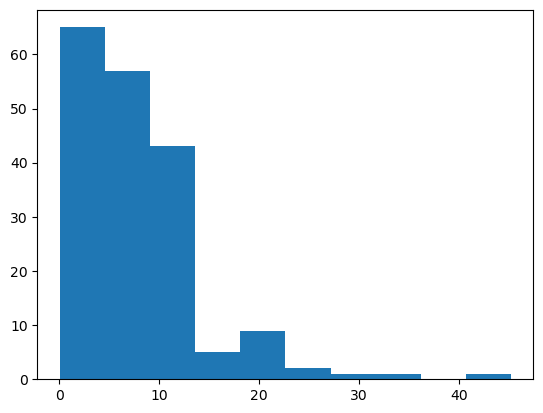

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df.loc[(df['ReNu']!='NO SHOW'),'AGE'])
plt.show()

In [27]:
median_age = df.loc[(df['ReNu']!='NO SHOW'),'AGE'].median() # 6.2 months
q25, q75 = np.percentile(a=df.loc[(df['ReNu']!='NO SHOW'),'AGE'], q=[25,75])
IQR = q75 - q25 # 7.3

In [38]:
males = df.loc[(df['ReNu']!='NO SHOW')&(df['Sex']=='M'),:]
females =  df.loc[(df['ReNu']!='NO SHOW')&(df['Sex']=='F'),:]
pm = len(males) / 184 # 49.5
pf = len(females) / 184 # 50.5

## Survival Analysis, previously unvaccinated children

In [21]:
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt
import numpy as np

Create array of Pe3 status and number of months to get Pe3, or time until last contact for dropouts.
Only include children >= 2 months old at date of first attendance and attended in at least one of March/April/May.

In [22]:
no_prev = df.loc[(df['PreV']=='No')&(df['AGE_MAY15']>=2), :]
df2 = no_prev.loc[(no_prev['Att1'] != 'None')|(no_prev['Att2'] != 'None')|(no_prev['Att3']!='None'),:]
pe3_status = []
pe3_time = []
for idx, row in df2.iterrows():
    if row['Att1'] != 'None': # first attended in March
        if row['P3Pe3'] == 'Yes': # received Pe3 after 2 months since first visit
            pe3_status.append(True) 
            pe3_time.append(2)
            continue
        if row['P4Pe3'] == 'Yes':  # received Pe3 after 3 months since first visit
            pe3_status.append(True)
            pe3_time.append(3)
            continue
        if row['P5Pe3'] == 'Yes': # received Pe3 after 4 months since first visit
            pe3_status.append(True)
            pe3_time.append(4)
            continue
        else: # calculate time until last contact
            pe3_status.append(False)
            if (row['Att2'] == 'None') & (row['Att3'] == 'None') & (row['Att4']=='None')&(row['Att5']=='None'): # left after March
                pe3_time.append(0)
            elif (row['Att2']!='None')&(row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                pe3_time.append(1)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                pe3_time.append(2)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                pe3_time.append(3)
            elif row['Att5']!='None': # no Pe3 by the end of the program
                pe3_time.append(4)

    elif (row['Att2'] != 'None')&(row['Att1']=='None'): # first attended in April
        if row['P4Pe3'] == 'Yes':
            pe3_status.append(True)
            pe3_time.append(2)
            continue
        if row['P5Pe3'] == 'Yes':
            pe3_status.append(True)
            pe3_time.append(3)
            continue
        else: # calculate time until last contact
            pe3_status.append(False)
            if (row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                pe3_time.append(0)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                pe3_time.append(1)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                pe3_time.append(2)
            elif row['Att5']!='None': # no Pe3 by the end of the program
                pe3_time.append(3)
    elif (row['Att2'] == 'None')&(row['Att1']=='None')&(row['Att3']!='None'): # first attended in May
        if row['P5Pe3'] == 'Yes':
            pe3_status.append(True)
            pe3_time.append(2)
            continue
        else: # calculate time until last contact
            pe3_status.append(False)
            if (row['Att4']=='None')&(row['Att5']=='None'): # left after May
                pe3_time.append(0)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                pe3_time.append(1)
            elif row['Att5']!='None': # no Pe3 by the end of the program
                pe3_time.append(2)


Create array of Po3 status and number of months to get Po3, or time until last contact for dropouts.
Only include children >= 2 months old at date of first attendance and attended in at least one of March/April/May.

In [23]:
po3_status = []
po3_time = []
for idx, row in df2.iterrows():
    if row['Att1'] != 'None': # first attended in March
        if row['P3Po3'] == 'Yes': # received Po3 after 2 months since first visit
            po3_status.append(True) 
            po3_time.append(2)
            continue
        if row['P4Po3'] == 'Yes':  # received Po3 after 3 months since first visit
            po3_status.append(True)
            po3_time.append(3)
            continue
        if row['P5Po3'] == 'Yes': # received Po3 after 4 months since first visit
            po3_status.append(True)
            po3_time.append(4)
            continue
        else: # calculate time until last contact
            po3_status.append(False)
            if (row['Att2'] == 'None') & (row['Att3'] == 'None') & (row['Att4']=='None')&(row['Att5']=='None'): # left after March
                po3_time.append(0)
            elif (row['Att2']!='None')&(row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                po3_time.append(1)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                po3_time.append(2)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                po3_time.append(3)
            elif row['Att5']!='None': # no Pe3 by the end of the program
                po3_time.append(4)

    elif (row['Att2'] != 'None')&(row['Att1']=='None'): # first attended in April
        if row['P4Po3'] == 'Yes':
            po3_status.append(True)
            po3_time.append(2)
            continue
        if row['P5Po3'] == 'Yes':
            po3_status.append(True)
            po3_time.append(3)
            continue
        else: # calculate time until last contact
            po3_status.append(False)
            if (row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                po3_time.append(0)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                po3_time.append(1)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                po3_time.append(2)
            elif row['Att5']!='None': # no Pe3 by the end of the program
                po3_time.append(3)
    elif (row['Att2'] == 'None')&(row['Att1']=='None')&(row['Att3']!='None'): # first attended in May
        if row['P5Po3'] == 'Yes':
            po3_status.append(True)
            po3_time.append(2)
            continue
        else: # calculate time until last contact
            po3_status.append(False)
            if (row['Att4']=='None')&(row['Att5']=='None'): # left after May
                po3_time.append(0)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                po3_time.append(1)
            elif row['Att5']!='None': # no Pe3 by the end of the program
                po3_time.append(2)

Create array of M2 status and number of months to get M2, or time until last contact for dropouts.
Only include children >= 9 months old at date of first attendance and attended in at least one of March/April/May/June.

In [24]:
of_age = df.loc[(df['PreV']=='No')&(df['AGE_JUNE15']>=9), :]
df3 = of_age.loc[(of_age['Att1'] != 'None')|(of_age['Att2'] != 'None')|(of_age['Att3']!='None')|(of_age['Att4']!='None'),:]
mmr_status = []
mmr_time = []
for idx, row in df3.iterrows():
    if row['Att1'] != 'None': # first attended in March
        if row['P2M2'] == 'Yes': # received M2 after 1 month since first visit
            mmr_status.append(True) 
            mmr_time.append(1)
            continue
        if row['P3M2'] == 'Yes':  # received M2 after 2 months since first visit
            mmr_status.append(True)
            mmr_time.append(2)
            continue
        if row['P4M2'] == 'Yes': # received M2 after 3 months since first visit
            mmr_status.append(True)
            mmr_time.append(3)
            continue
        if row['P5M2'] == 'Yes': # received M2 after 4 months since first visit
            mmr_status.append(True)
            mmr_time.append(4)
            continue
        else: # calculate time until last contact
            mmr_status.append(False)
            if (row['Att2'] == 'None') & (row['Att3'] == 'None') & (row['Att4']=='None')&(row['Att5']=='None'): # left after March
                mmr_time.append(0)
            elif (row['Att2']!='None')&(row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                mmr_time.append(1)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                mmr_time.append(2)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                mmr_time.append(3)
            elif row['Att5']!='None': # no M2 by the end of the program
                mmr_time.append(4)
    elif row['Att2'] != 'None': # first attended in April
        if row['P3M2'] == 'Yes': # received M2 after 1 month since first visit
            mmr_status.append(True) 
            mmr_time.append(1)
            continue
        if row['P4M2'] == 'Yes':  # received M2 after 2 months since first visit
            mmr_status.append(True)
            mmr_time.append(2)
            continue
        if row['P5M2'] == 'Yes': # received M2 after 3 months since first visit
            mmr_status.append(True)
            mmr_time.append(3)
            continue
        else: # calculate time until last contact
            mmr_status.append(False)
            if (row['Att2']!='None')&(row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                mmr_time.append(0)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                mmr_time.append(1)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                mmr_time.append(2)
            elif row['Att5']!='None': # no M2 by the end of the program
                mmr_time.append(3)
    elif row['Att3'] != 'None': # first attended in May
        if row['P4M2'] == 'Yes': # received M2 after 1 month since first visit
            mmr_status.append(True) 
            mmr_time.append(1)
            continue
        if row['P5M2'] == 'Yes':  # received M2 after 2 months since first visit
            mmr_status.append(True)
            mmr_time.append(2)
            continue
        else: # calculate time until last contact
            mmr_status.append(False)
            if (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                mmr_time.append(0)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                mmr_time.append(1)
            elif row['Att5']!='None': # no M2 by the end of the program
                mmr_time.append(2)
    elif row['Att4'] != 'None': # first attended in June
        if row['P5M2'] == 'Yes': # received M2 after 1 month since first visit
            mmr_status.append(True) 
            mmr_time.append(1)
            continue
        else: # calculate time until last contact
            mmr_status.append(False)
            if (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                mmr_time.append(0)
            elif row['Att5']!='None': # no M2 by the end of the program
                mmr_time.append(1)

Create array of BCG status and number of months to get Pe3, or time until last contact for dropouts.
Only include children <= 12 months old at date of first attendance and attended at least once

In [25]:
bcg = df.loc[(df['PreV']=='No')&(df['AGE']<=12), :]
bcg_status = []
bcg_time = []
for idx, row in bcg.iterrows():
    if row['Att1'] != 'None': # first attended in March
        if row['P1BC'] == 'Yes': # received BCG after 0 months since first visit
            bcg_status.append(True) 
            bcg_time.append(0)
            continue
        if row['P2BC'] == 'Yes':  # received BCG after 1 months since first visit
            bcg_status.append(True)
            bcg_time.append(1)
            continue
        if row['P3BC'] == 'Yes': # received BCG after 2 months since first visit
            bcg_status.append(True)
            bcg_time.append(2)
            continue
        if row['P4BC'] == 'Yes': # received BCG after 3 months since first visit
            bcg_status.append(True)
            bcg_time.append(3)
            continue
        if row['P5BC'] == 'Yes': # received BCG after 4 months since first visit
            bcg_status.append(True)
            bcg_time.append(4)
            continue
        else: # calculate time until last contact
            bcg_status.append(False)
            if (row['Att2'] == 'None') & (row['Att3'] == 'None') & (row['Att4']=='None')&(row['Att5']=='None'): # left after March
                bcg_time.append(0)
            elif (row['Att2']!='None')&(row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                bcg_time.append(1)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                bcg_time.append(2)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                bcg_time.append(3)
            elif row['Att5']!='None': # no BCG by the end of the program
                bcg_time.append(4)
    elif row['Att2'] != 'None': # first attended in April
        if row['P2BC'] == 'Yes': # received BC after 0 months since first visit
            bcg_status.append(True) 
            bcg_time.append(0)
            continue
        if row['P3BC'] == 'Yes':  # received BC after 1 month since first visit
            bcg_status.append(True)
            bcg_time.append(1)
            continue
        if row['P4BC'] == 'Yes': # received BC after 2 months since first visit
            bcg_status.append(True)
            bcg_time.append(2)
            continue
        if row['P5BC'] == 'Yes': # received BC after 3 months since first visit
            bcg_status.append(True)
            bcg_time.append(3)
            continue
        else: # calculate time until last contact
            bcg_status.append(False)
            if (row['Att2']!='None')&(row['Att3'] == 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after April
                bcg_time.append(0)
            elif (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                bcg_time.append(1)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                bcg_time.append(2)
            elif row['Att5']!='None': # no BC by the end of the program
                bcg_time.append(3)
    elif row['Att3'] != 'None': # first attended in May
        if row['P3BC'] == 'Yes': # received BC after 0 months since first visit
            bcg_status.append(True) 
            bcg_time.append(0)
            continue
        if row['P4BC'] == 'Yes':  # received BC after 1 month since first visit
            bcg_status.append(True)
            bcg_time.append(1)
            continue
        if row['P5BC'] == 'Yes':  # received BC after 2 months since first visit
            bcg_status.append(True)
            bcg_time.append(2)
            continue
        else: # calculate time until last contact
            bcg_status.append(False)
            if (row['Att3'] != 'None')&(row['Att4']=='None')&(row['Att5']=='None'): # left after May
                bcg_time.append(0)
            elif (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                bcg_time.append(1)
            elif row['Att5']!='None': # no M2 by the end of the program
                bcg_time.append(2)
    elif row['Att4'] != 'None': # first attended in June
        if row['P4BC'] == 'Yes': # received BC after 0 months since first visit
            bcg_status.append(True) 
            bcg_time.append(0)
            continue
        if row['P5BC'] == 'Yes': # received BC after 1 month since first visit
            bcg_status.append(True) 
            bcg_time.append(1)
            continue
        else: # calculate time until last contact
            bcg_status.append(False)
            if (row['Att4']!='None')&(row['Att5']=='None'): # left after June
                bcg_time.append(0)
            elif row['Att5']!='None': # no M2 by the end of the program
                bcg_time.append(1)
    elif row['Att5'] != 'None': # first attended in July
        if row['P5BC'] == 'Yes': # received BC after 0 months since first visit
            bcg_status.append(True) 
            bcg_time.append(0)
        else:
            bcg_status.append(False) 
            bcg_time.append(0)
            

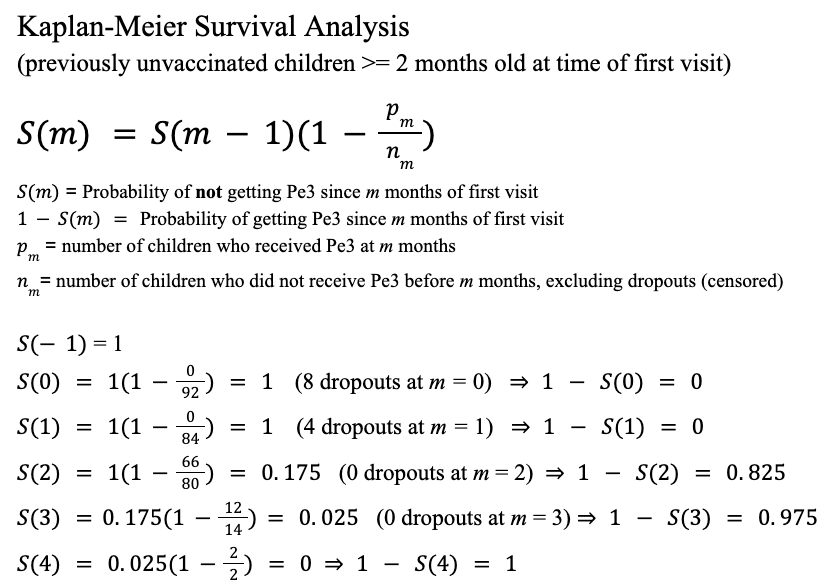

Kaplan-Meier curve with censoring

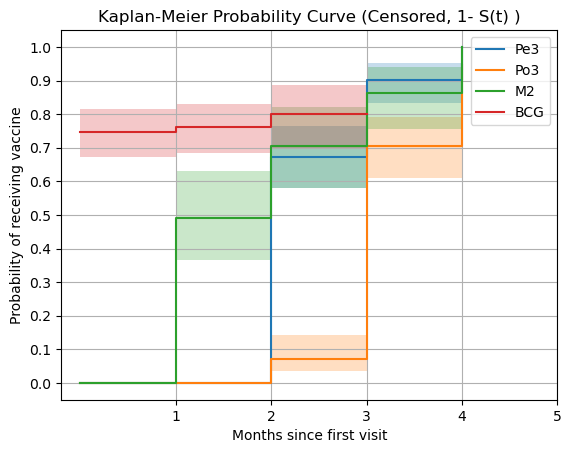

In [26]:
time, prob, ci = kaplan_meier_estimator(event=pe3_status, time_exit=pe3_time, conf_type="log-log")
time2, prob2, ci2 = kaplan_meier_estimator(event=po3_status, time_exit=po3_time, conf_type="log-log")
time3, prob3, ci3 = kaplan_meier_estimator(event=mmr_status, time_exit=mmr_time, conf_type="log-log")
time4, prob4, ci4 = kaplan_meier_estimator(event=bcg_status, time_exit=bcg_time, conf_type="log-log")

plt.step(time, (1-prob), where='post', label='Pe3')
plt.step(time2, (1-prob2), where='post', label='Po3')
plt.step(time3, (1-prob3), where='post', label='M2')
plt.step(time4, (1-prob4), where='post', label='BCG')

plt.fill_between(time, (1-ci[1]), (1-ci[0]), alpha=0.25, step="post")
plt.fill_between(time2, (1-ci2[1]), (1-ci2[0]), alpha=0.25, step="post")
plt.fill_between(time3, (1-ci3[1]), (1-ci3[0]), alpha=0.25, step="post")
plt.fill_between(time4, (1-ci4[1]), (1-ci4[0]), alpha=0.25, step="post")

plt.xlabel('Months since first visit')
plt.ylabel('Probability of receiving vaccine')
plt.xticks(range(1, 6))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Kaplan-Meier Probability Curve (Censored, 1- S(t) )')
plt.legend()
plt.grid()
plt.show()

In [27]:
1-prob4

array([0.74637681, 0.76129582, 0.80107985, 0.80107985])

Function to calculate survival probabilities

In [28]:
def calculate_probabilities(event, time_exit, reverse=False):
    """Calculate survival probabilities for a status array and a time array.
    Set reverse to true to calculate 1- S(t)."""
    z = list(zip(event, time_exit))
    p0 = 0
    p1 = 0
    p2 = 0
    p3 = 0
    p4 = 0
    for item in z:
        if item == (True, 0):
            p0 = p0 + 1
        if item == (True, 1):
            p1 = p1 + 1
        if item == (True, 2):
            p2 = p2 + 1
        if item == (True, 3):
            p3 = p3 + 1
        if item == (True, 4):
            p4 = p4 + 1
    n0 = len(event)
    n1 = n0 - p0
    n2 = n1 - p1
    n3 = n2 - p2 
    n4 = n3 - p3
    s0 = 1*(1-(p0/n0))
    s1 = s0*(1-(p1/n1))
    s2 = s1*(1-(p2/n2))
    s3 = s2*(1-(p3/n3))
    s4 = s3*(1-(p4/n4))
    if reverse:
        return [0,1,2,3,4], [(1-s0), (1-s1), (1-s2), (1-s3), (1-s4)]
    if not reverse:
        return [0,1,2,3,4], [s0, s1, s2, s3, s4]
    


Function to calculate confidence intervals

In [29]:
import math
import numpy as np
def calculate_CI(status, time, reverse=False):
    n = len(status)
    times, probs = calculate_probabilities(event=status, time_exit=time, reverse=reverse)
    CIs = []
    for t in range(5):
        stddev_st = np.sqrt((probs[t]/n)*(1-probs[t]))
        lower = probs[t] - 1.96*stddev_st
        upper = probs[t] + 1.96*stddev_st
        CIs.append((lower, upper))
    return np.array(CIs) 
    

plot probabilities with confidence intervals

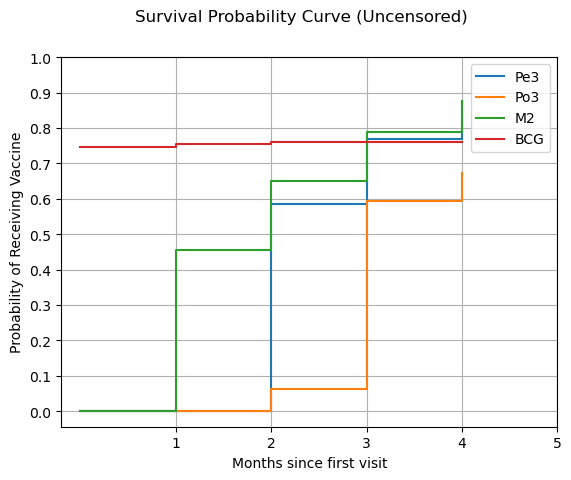

In [30]:
times, probs = calculate_probabilities(event=pe3_status, time_exit=pe3_time, reverse=True) 
times2, probs2 = calculate_probabilities(event=po3_status, time_exit=po3_time, reverse=True) 
times3, probs3 = calculate_probabilities(event=mmr_status, time_exit=mmr_time, reverse=True) 
times4, probs4 = calculate_probabilities(event=bcg_status, time_exit=bcg_time, reverse=True) 

ci = calculate_CI(status=pe3_status, time=pe3_time, reverse=True)
ci2 = calculate_CI(status=po3_status, time=po3_time, reverse=True)
ci3 = calculate_CI(status=mmr_status, time=mmr_time, reverse=True)
ci4 = calculate_CI(status=bcg_status, time=bcg_time, reverse=True)

plt.step(times, probs, where='post', label='Pe3')
plt.step(times2, probs2, where='post', label='Po3')
plt.step(times3, probs3, where='post', label='M2')
plt.step(times4, probs4, where='post', label='BCG')

plt.xlabel('Months since first visit')
plt.ylabel('Probability of Receiving Vaccine')
plt.xticks(range(1, 6))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.suptitle('Survival Probability Curve (Uncensored)')
plt.grid()
plt.legend()
plt.show()

Confidence Intervals

In [31]:
pe3_prob =probs[-1]
po3_prob = probs2[-1]
mmr_prob = probs3[-1]
bcg_prob = probs4[-1]

In [33]:
def calculate_stddev(prob_and_status):
    STDs= []
    for each in prob_and_status:
        stddev = np.sqrt( (each[0]/each[1])*(1-each[0]) )
        STDs.append(stddev)
    return STDs
list_tuple = [( pe3_prob, len(pe3_status) ), (po3_prob, len(po3_status) ), (mmr_prob, len(mmr_status) ),
              (bcg_prob,len(bcg_status) )]
STD_list = calculate_stddev(prob_and_status=list_tuple)

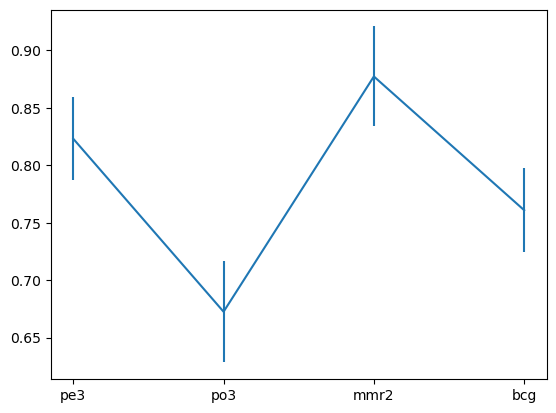

In [42]:
pe3_ci = [pe3_prob-1.96*STD_list[0], pe3_prob+1.96*STD_list[0] ]
po3_ci = [po3_prob-1.96*STD_list[1], po3_prob+1.96*STD_list[1] ]
mmr_ci = [mmr_prob-1.96*STD_list[2], mmr_prob+1.96*STD_list[2] ]
bcg_ci = [bcg_prob-1.96*STD_list[3], bcg_prob+1.96*STD_list[3] ]
plt.errorbar(x=['pe3','po3','mmr2','bcg'], y=[pe3_prob,po3_prob,mmr_prob,bcg_prob],
             yerr=[STD_list])
plt.show()

### Percent unvaccinated stratified by age, shown as barplot

In [12]:
df.loc[(df['ReNu'] != 'NO SHOW')&(df['AGE_MAY15']>=2)&(df['PreV']=='No'),:]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
0,1,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်အာဗေးလယ်,M,2023-02-02,...,Yes,Yes,No,No,NaN,1.366667,2.366667,3.366667,4.366667,5.366667
1,2,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မသူဇာဝင်း,F,2023-01-19,...,Yes,Yes,No,No,NaN,1.833333,2.833333,3.833333,4.833333,5.833333
2,3,2023-03-15 00:00:00,None,None,2023-06-15 00:00:00,2023-07-15 00:00:00,No,မစုစု,F,2022-05-26,...,Yes,Yes,Yes,Yes,NaN,9.766667,10.766667,11.766667,12.766667,13.766667
3,4,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်စတီဗင်,M,2022-12-09,...,Yes,Yes,No,No,NaN,3.200000,4.200000,5.200000,6.200000,7.200000
4,5,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,မောင်ဂျက်စတင်း,M,2022-06-07,...,Yes,Yes,Yes,Yes,NaN,9.366667,10.366667,11.366667,12.366667,13.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,None,None,None,None,2023-07-15 00:00:00,No,မောင်သောမတ်စ်,M,2023-01-28,...,No,No,No,No,NaN,5.600000,3.600000,4.600000,5.600000,5.600000
177,178,None,None,None,None,2023-07-15 00:00:00,No,မောင်ဂျက်စတင်း,M,2023-02-17,...,No,No,No,No,NaN,4.933333,2.933333,3.933333,4.933333,4.933333
179,180,None,None,None,None,2023-07-15 00:00:00,No,မဂျူးလိယက်,F,2023-04-13,...,No,No,No,No,NaN,3.100000,1.100000,2.100000,3.100000,3.100000
180,181,None,None,None,None,2023-07-15 00:00:00,No,မောင်ထားရု,M,2023-04-09,...,No,No,No,No,NaN,3.233333,1.233333,2.233333,3.233333,3.233333


In [32]:
shows = df.loc[df['ReNu']!='NO SHOW', :]

In [33]:
zerotoone = len(shows.loc[(shows['AGE']<2)&(shows['PreV']=='No'),:]) / len(shows.loc[shows['AGE']<2,:]) # 100%
twotothree = len(shows.loc[(shows['AGE']>=2)&(shows['AGE']<4)&(shows['PreV']=='No'),:]) / len(shows.loc[(shows['AGE']>=2)&(shows['AGE']<4),:]) # 94%
fourtofive = len(shows.loc[(shows['AGE']>=4)&(shows['AGE']<6)&(shows['PreV']=='No'),:]) / len(shows.loc[(shows['AGE']>=4)&(shows['AGE']<6),:]) # 90%
sixtoseven = len(shows.loc[(shows['AGE']>=6)&(shows['AGE']<8)&(shows['PreV']=='No'),:]) / len(shows.loc[(shows['AGE']>=6)&(shows['AGE']<8),:]) # 70%
eighttonine = len(shows.loc[(shows['AGE']>=8)&(shows['AGE']<10)&(shows['PreV']=='No'),:])/len(shows.loc[(shows['AGE']>=8)&(shows['AGE']<10),:]) # 81%
tentoeleven = len(shows.loc[(shows['AGE']>=10)&(shows['AGE']<12)&(shows['PreV']=='No'),:])/len(shows.loc[(df['AGE']>=10)&(shows['AGE']<12),:]) # 88%
twelveandover = len(shows.loc[(df['AGE']>=12)&(shows['PreV']=='No'),:]) / len(shows.loc[(shows['AGE']>=12),:]) # 26%

Add trendline

In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0, 1, 2, 3, 4, 5, 6]).reshape(-1,1)
y = [zerotoone*100, twotothree*100, fourtofive*100, sixtoseven*100, eighttonine*100, tentoeleven*100, twelveandover*100]

model = LinearRegression().fit(X, y)
y_pred = [model.coef_ * x + model.intercept_ for x in X]

calculate standard deviations

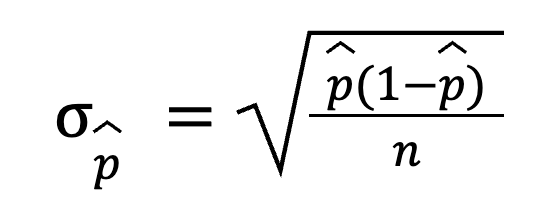

In [35]:
yerr1 = np.sqrt((zerotoone*(1-zerotoone))/24) # 0to1
yerr2 = np.sqrt((twotothree*(1-twotothree))/34) # 2to3
yerr3 =  np.sqrt((fourtofive*(1-fourtofive))/30) # 4to5
yerr4 = np.sqrt((sixtoseven*(1-sixtoseven))/23) # 6to7
yerr5 = np.sqrt((eighttonine*(1-eighttonine))/21) # 8to9
yerr6 = np.sqrt((tentoeleven*(1-tentoeleven))/25) # 10to11
yerr7 = np.sqrt((twelveandover*(1-twelveandover))/27) # 12+
yerr = [yerr1*100, yerr2*100, yerr3*100, yerr4*100, yerr5*100, yerr6*100, yerr7*100]

Plot bar plot

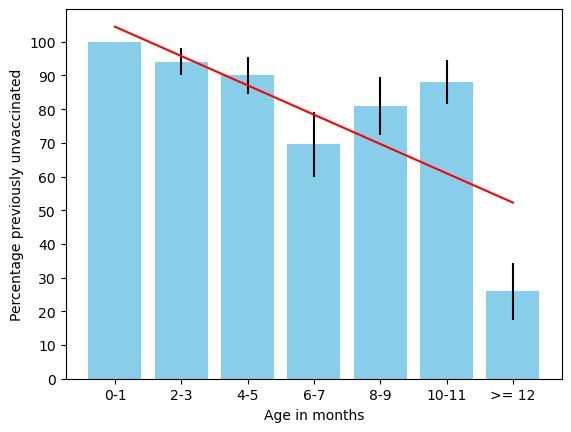

In [36]:
x = ['0-1', '2-3','4-5','6-7','8-9','10-11','>= 12']
y = [zerotoone*100, twotothree*100, fourtofive*100, sixtoseven*100, eighttonine*100, tentoeleven*100, twelveandover*100]
plt.bar(x, y, yerr=yerr, color='skyblue')
plt.xlabel('Age in months')
plt.ylabel('Percentage previously unvaccinated')
plt.yticks(range(0,110,10))
plt.plot(X, y_pred, color='red')
plt.show()

### Amount of clinics each previously unvaccinated child has attended

In [12]:
attendees = df.loc[(df['ReNu']!='NO SHOW')&(df['PreV']=='No'), :]
num_clinics = []
for idx, row in attendees.iterrows():
    count = 0
    for i in range(1, 6):
        if row[f'Att{i}'] != 'None':
            count = count + 1
    num_clinics.append(count)

In [17]:
52/145

0.3586206896551724

In [15]:
count = 0
for num in num_clinics:
    if num < 3:
        count = count + 1
print(count)

52


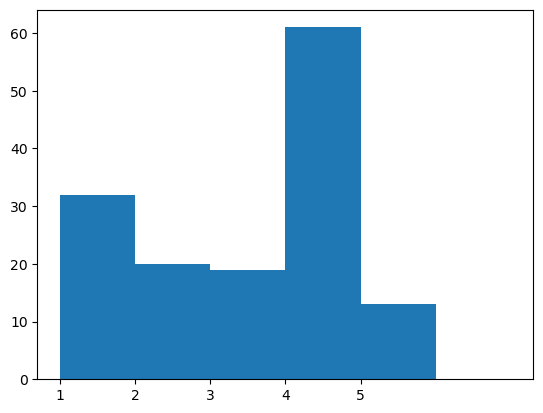

In [13]:
n = plt.hist(num_clinics, histtype='stepfilled' , bins=[1, 2, 3, 4, 5, 6, 7])
plt.xticks(range(1, 6))
plt.show()
# plt.yticks(range(0, 70, 2))

#### Amount of clinics a specified population has attended

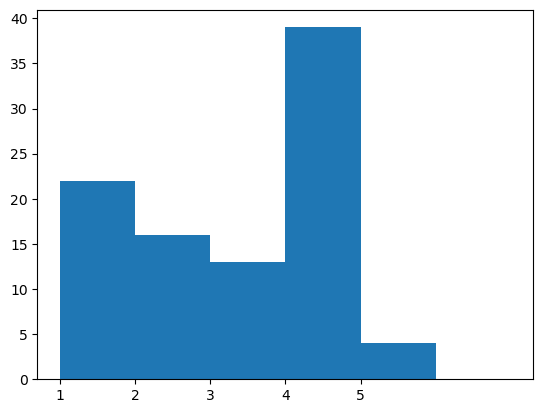

In [75]:
import matplotlib.pyplot
num_clinics = []
pop = df.loc[(df['PreV']=='No')&(df['Sex']=='F'), :] # replace with anything else
for idx, row in pop.iterrows():
    count = 0
    for i in range(1, 6):
        if row[f'Att{i}'] != 'None':
            count = count + 1
    num_clinics.append(count)
n = matplotlib.pyplot.hist(num_clinics, histtype='stepfilled' , bins=[1, 2, 3, 4, 5, 6, 7])
matplotlib.pyplot.xticks(range(1, 6))
matplotlib.pyplot.show()

In [78]:
import numpy as np
print(np.median(num_clinics))
np.quantile(num_clinics, 0.75, axis=0) - np.quantile(num_clinics, 0.25, axis=0)

3.0


2.0

In [67]:
np.percentile(num_clinics, 0, axis=0)

1.0

In [54]:
no_show = df.loc[df['ReNu'] == 'NO SHOW', :]
no_show.loc[no_show['Sex']=='M', :]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
185,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,?,မောင်ဂျွန်ခရစ်ဆိုစတုန်း,M,2022-09-13,...,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,6.100000,4.100000,5.100000,6.100000,6.100000
186,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,?,မောင်ရိုမားနို,M,2022-02-28,...,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,12.666667,10.666667,11.666667,12.666667,12.666667
187,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,?,မောင်ပက်ထရစ်,M,2022-03-17,...,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,12.100000,10.100000,11.100000,12.100000,12.100000
188,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,?,မောင်စိုးမောင်,M,2022-06-12,...,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,9.200000,7.200000,8.200000,9.200000,9.200000
189,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,?,မောင်ခရစ္စတီးနို,M,2022-12-22,...,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,2.766667,0.766667,1.766667,2.766667,2.766667
190,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,?,မောင်ဘရူနိုပေါလ်,M,2023-02-03,...,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,1.333333,-0.666667,0.333333,1.333333,1.333333
193,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,?,မောင်စောနေလင်းထွန်း,M,2022-04-07,...,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,11.400000,9.400000,10.400000,11.400000,11.400000
195,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,?,မောင်စောထူးကလို,M,2022-11-10,...,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,4.166667,2.166667,3.166667,4.166667,4.166667
198,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,?,အောင်နိုင်ဦး,M,2022-12-19,...,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,2.866667,0.866667,1.866667,2.866667,2.866667
212,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,?,မောင်ပေါလူ,M,2022-07-09,...,NO SHOW,NO SHOW,NO SHOW,NO SHOW,NO SHOW,8.300000,6.300000,7.300000,8.300000,8.300000


### Analysis on previously vaccinated children

In [27]:
prev = df.loc[df['PreV']=='Yes',:]
prev.loc[(prev['P5M1']=='P'),:]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
132,133,None,None,2023-05-15 00:00:00,None,None,Yes,မဆောင်းခက်‌နွေ,F,2021-11-21,...,P,P,P,Yes,NaN,18.000000,17.000000,18.000000,19.000000,20.000000
133,134,None,None,2023-05-15 00:00:00,None,None,Yes,မောင်အင်ဂနီးရှက်,M,2021-08-04,...,P,P,P,Yes,NaN,21.633333,20.633333,21.633333,22.633333,23.633333
135,136,None,None,2023-05-15 00:00:00,None,None,Yes,မအန်ဂျလီးနာ,F,2021-12-12,...,P,P,P,Yes,NaN,17.300000,16.300000,17.300000,18.300000,19.300000
159,160,None,None,None,2023-06-15 00:00:00,None,Yes,မလင်းလက်‌ရွှေရည်,F,2021-12-08,...,P,P,P,Yes,NaN,18.466667,16.466667,17.466667,18.466667,19.466667
172,173,None,None,None,None,2023-07-15 00:00:00,Yes,မောင်ဖရန်စစ်,M,2021-09-20,...,P,Yes,P,Yes,NaN,22.100000,20.100000,21.100000,22.100000,22.100000
181,182,None,None,None,None,2023-07-15 00:00:00,Yes,မောင်ပီတာစိုး,M,2019-10-28,...,P,P,P,Yes,NaN,45.200000,43.200000,44.200000,45.200000,45.200000


In [30]:
df['AGE'].median()

6.316666666666666

### Analyzing relationship between UTD and gender, internally displaced, in census, etc

Group 1: >= 2 months by May and < 9 months in June (Children who could only get Penta, OPV, BCG)

In [74]:
g1 = df.loc[(df['AGE_MAY15']>=2)&(df['AGE_JUNE15']<9)&(df['ReNu']!='NO SHOW'),:] # could not have gotten M2

In [76]:
# UTD = Pe3, Po3, BCG
utd = g1.loc[(g1['UTD']=='Yes')&((g1['P5BC']=='Yes')|(g1['P5BC']=='P')),:] # 40/81 UTD (49%)

In [91]:
utd_and_female = g1.loc[(g1['UTD']=='Yes')&((g1['P5BC']=='Yes')|(g1['P5BC']=='P'))&(g1['Sex']=='F'),:]
# 18/39 of females are UTD (46% of all females)
utd_and_male = g1.loc[(g1['UTD']=='Yes')&((g1['P5BC']=='Yes')|(g1['P5BC']=='P'))&(g1['Sex']=='M'),:]
# 22/42 of males are UTD (52% of all males)

In [104]:
utd_in_census = g1.loc[(g1['UTD']=='Yes')&((g1['P5BC']=='Yes')|(g1['P5BC']=='P'))&(g1['CeNu']!='None'),:]
# 23/37 in census are UTD (62% of all census children)
utd_not_in_census = g1.loc[(g1['UTD']=='Yes')&((g1['P5BC']=='Yes')|(g1['P5BC']=='P'))&(g1['CeNu']=='None'),:]
# 17/44 not in census are UTD (39% of all non-census children)

Group 2: >= 9 months in June and if no PreV, <=12 months at first visit (Children who could get Pe3, Po3, M2, BCG)

In [133]:
good = []
g2 = df.loc[(df['AGE_JUNE15']>=9)&(df['ReNu']!='NO SHOW'),:]
for idx, row in g2.iterrows():
    if row['PreV'] == 'No':
        if row['AGE'] <= 12:
            good.append('Yes')
        elif (row['AGE'] > 12)&((row['P5BC']=='Yes')|(row['P5BC']=='P')):
            good.append('Yes')
        elif (row['AGE'] > 12)&((row['P5BC']=='No')|(row['P5BC']=='O')|(row['P5BC']=='TO')):
            good.append('No')
    else:
        good.append('Yes')
g2['good'] = good
g2_new = g2.loc[g2['good']=='Yes',:]

/var/folders/7y/1xn42rwd5hxgh74ds6lh1rmm0000gn/T/ipykernel_53731/3378074415.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g2['good'] = good


In [139]:
utd = g2_new.loc[(g2_new['UTD']=='Yes')&((g2_new['P5BC']=='Yes')|(g2_new['P5BC']=='P'))&((g2_new['P5M2']=='Yes')|(g2_new['P5M2']=='P')),:] # 58/85 UTD (68%)

In [152]:
utd_and_female2 = g2_new.loc[(g2_new['UTD']=='Yes')&((g2_new['P5BC']=='Yes')|(g2_new['P5BC']=='P'))&((g2_new['P5M2']=='Yes')|(g2_new['P5M2']=='P'))&(g2_new['Sex']=='F'),:]
# 32/44 of females are UTD (73% of all females)

utd_and_male2 = g2_new.loc[(g2_new['UTD']=='Yes')&((g2_new['P5BC']=='Yes')|(g2_new['P5BC']=='P'))&((g2_new['P5M2']=='Yes')|(g2_new['P5M2']=='P'))&(g2_new['Sex']=='M'),:]
# 26/41 of males are UTD (63% of all males)

In [159]:
utd_in_census2 = g2_new.loc[(g2_new['UTD']=='Yes')&((g2_new['P5BC']=='Yes')|(g2_new['P5BC']=='P'))&((g2_new['P5M2']=='Yes')|(g2_new['P5M2']=='P'))&(g2_new['CeNu']!='None'),:]
# 32/46 of census children are UTD (70% of all census children)
utd_not_in_census2 = g2_new.loc[(g2_new['UTD']=='Yes')&((g2_new['P5BC']=='Yes')|(g2_new['P5BC']=='P'))&((g2_new['P5M2']=='Yes')|(g2_new['P5M2']=='P'))&(g2_new['CeNu']=='None'),:]
# 26/39 of non-census children are UTD (67% of all non-census children)

### Penta and OPV analysis (children >= 2 months in May)

In [223]:
pe_opv = df.loc[(df['AGE_MAY15']>=2)&(df['ReNu']!='NO SHOW'),:]
# 170/184 (92%) (are >= 2 months in May)

prev = pe_opv.loc[pe_opv['PreV']=='Yes',:] # 39/170 (23% of pe_opv) have PreV
no_prev = pe_opv.loc[pe_opv['PreV']=='No',:] # 131/170 (77% of pe_opv) have no PreV

prev_and_utd = pe_opv.loc[(pe_opv['PreV']=='Yes')&(pe_opv['UTD']=='Yes'),:] # 34/39 (87% of PreV) have PreV and are UTD
no_prev_and_utd = pe_opv.loc[(pe_opv['PreV']=='No')&(pe_opv['UTD']=='Yes'),:] # 76/113 (58% of no PreV) have no PreV and are UTD

### MMR analysis (children >= 9 months in June)

In [255]:
mmr = df.loc[(df['AGE_JUNE15']>=9)&(df['ReNu']!='NO SHOW'), :]
# 89/184 (48% of all attendees) are at least 9 months old in June

mmr_prev =  mmr.loc[mmr['PreV']=='Yes', :] # 31/89 (35%) of the children have PreV
mmr_no_prev = mmr.loc[mmr['PreV']=='No', :] # 58/89 (65%) of the children have no PreV

mmr_prev_and_utd =  mmr.loc[(mmr['PreV']=='Yes')&((mmr['P5M2']=='Yes')|(mmr['P5M2']=='P')), :]
# 23/31 (74%) have PreV and have M2

mmr_no_prev_and_utd = mmr.loc[(mmr['PreV']=='No')&(mmr['P5M2']=='Yes'), :]
# 50/58 (86%) have no PreV and have M2


In [276]:
mmr_prev

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,UTD,P1BC,P1Po1,...,CeNu,CAMP,CeCa,Sex,DOB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
44,45,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,Yes,No,P,P,...,34,ဟိုယာ,ဟိုယာရှေးလူFှု,M,2022-05-05,10.466667,11.466667,12.466667,13.466667,14.466667
46,47,2023-03-15 00:00:00,None,2023-05-15 00:00:00,None,None,Yes,Yes,P,P,...,50,စိန်တောင်တန်း ( IDP ),စိန်တောင်တန်း,M,2022-03-08,12.400000,13.400000,14.400000,15.400000,16.400000
51,52,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,Yes,TO,O,...,146,စိန်တောင်တန်း ( IDP ),စိန်တောင်တန်း,F,2021-10-03,17.600000,18.600000,19.600000,20.600000,21.600000
65,66,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,Yes,TO,O,...,139,ရာဧပရား ( IDP ),ဟိုယာ,F,2022-03-01,12.633333,13.633333,14.633333,15.633333,16.633333
67,68,2023-03-15 00:00:00,None,None,None,None,Yes,Yes,P,P,...,None,ဒေါလာစော ( IDP ),NONE LISTED,M,2022-08-05,7.400000,8.400000,9.400000,10.400000,11.400000
68,69,2023-03-15 00:00:00,None,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,No,P,P,...,None,ဒေါလာစော ( IDP ),NONE LISTED,M,2022-08-24,6.766667,7.766667,8.766667,9.766667,10.766667
70,71,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,Yes,Yes,TO,P,...,43,သိုသီးဖို ( IDP ),သိုသီးဖို,F,2022-02-25,12.766667,13.766667,14.766667,15.766667,16.766667
72,73,2023-03-15 00:00:00,None,None,None,None,Yes,No,P,P,...,115,ဒေါလာစော ( IDP ),‌ဒေါလာစောစစ်ရှောင်,M,2022-05-02,10.566667,11.566667,12.566667,13.566667,14.566667
82,83,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,Yes,P,P,...,None,ဒေါလာစော ( IDP ),NONE LISTED,F,2022-09-07,6.300000,7.300000,8.300000,9.300000,10.300000
93,94,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,Yes,O ?,O,...,None,ဒေါလာစော ( IDP ),NONE LISTED,M,2022-08-12,7.166667,8.166667,9.166667,10.166667,11.166667


### other analyses

In [113]:
df.loc[(df['PreV']=='No')&(df['CeNu']!='None'),:] # 74/84 (88%) of census children have no PreV
df.loc[(df['PreV']=='No')&(df['CeNu']=='None'),:] # 71/100 (71%) of non-census children have no PreV

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,UTD,P1BC,P1Po1,...,CeNu,CAMP,CeCa,Sex,DOB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
3,4,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,Yes,O,...,None,ခါးဘယ်,NONE LISTED,M,2022-12-09,3.200000,4.200000,5.200000,6.200000,7.200000
7,8,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,Yes,O,...,None,ရွှေ‌ညောင်ကုန်း(ခါးဘယ်),NONE LISTED,M,2022-04-08,11.366667,12.366667,13.366667,14.366667,15.366667
9,10,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,Yes,O,...,None,ထေခို,NONE LISTED,F,2023-01-28,1.533333,2.533333,3.533333,4.533333,5.533333
13,14,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,S,S,...,None,ထေခို,NONE LISTED,F,2022-11-09,4.200000,5.200000,6.200000,7.200000,8.200000
21,22,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,No,Yes,Yes,O,...,None,ဟိုယာ,NONE LISTED,F,2023-02-11,1.066667,2.066667,3.066667,4.066667,5.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,178,None,None,None,None,2023-07-15 00:00:00,No,No,-,-,...,None,ပျားချောင်း ( IDP ),NaN,F,2023-02-17,4.933333,2.933333,3.933333,4.933333,4.933333
178,179,None,None,None,None,2023-07-15 00:00:00,No,No,-,-,...,None,ထိုခွီဆို,NaN,F,2023-04-18,2.933333,0.933333,1.933333,2.933333,2.933333
179,180,None,None,None,None,2023-07-15 00:00:00,No,No,-,-,...,None,ယိုစပရားကျေးရွာ,NaN,F,2023-04-13,3.100000,1.100000,2.100000,3.100000,3.100000
180,181,None,None,None,None,2023-07-15 00:00:00,No,No,-,-,...,None,ကေလျား IDP,NaN,F,2023-04-09,3.233333,1.233333,2.233333,3.233333,3.233333


### Table C
completed = finished all vaccines for age group or attended in July (even if they missed some clinics before)

In [22]:
dropouts = df.loc[(df['Att4']=='None')&(df['Att5']=='None'),:]

In [20]:
pd.set_option('display.max_columns', 40)

In [17]:
x = df.loc[(df['UTD']=='Yes')&(df['P5BC']=='Yes')&(df['P5M2']=='Yes'),:]
# 37 no PreV got all vaccines

### Percentage that got BCG by age group

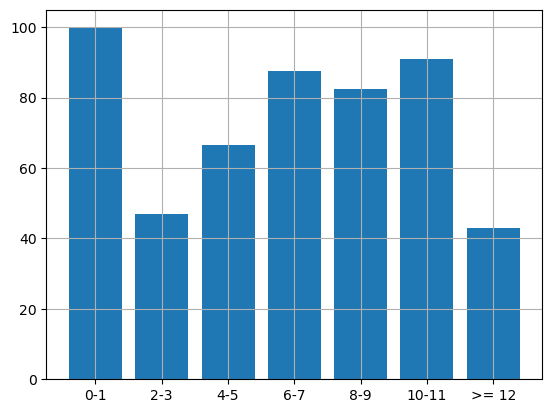

In [21]:
import matplotlib.pyplot as plt
shows = df.loc[df['ReNu']!='NO SHOW', :]
zerotoone = len(shows.loc[(shows['AGE']<2)&(shows['PreV']=='No')&(shows['P5BC']=='Yes'),:]) / len(shows.loc[(shows['AGE']<2)&(shows['PreV']=='No'),:]) # 100%
twotothree = len(shows.loc[(shows['AGE']>=2)&(shows['AGE']<4)&(shows['PreV']=='No')&(shows['P5BC']=='Yes'),:]) / len(shows.loc[(shows['AGE']>=2)&(shows['AGE']<4)&(shows['PreV']=='No'),:]) # 94%
fourtofive = len(shows.loc[(shows['AGE']>=4)&(shows['AGE']<6)&(shows['PreV']=='No')&(shows['P5BC']=='Yes'),:]) / len(shows.loc[(shows['AGE']>=4)&(shows['AGE']<6)&(shows['PreV']=='No'),:]) # 90%
sixtoseven = len(shows.loc[(shows['AGE']>=6)&(shows['AGE']<8)&(shows['PreV']=='No')&(shows['P5BC']=='Yes'),:]) / len(shows.loc[(shows['AGE']>=6)&(shows['AGE']<8)&(shows['PreV']=='No'),:]) # 70%
eighttonine = len(shows.loc[(shows['AGE']>=8)&(shows['AGE']<10)&(shows['PreV']=='No')&(shows['P5BC']=='Yes'),:])/len(shows.loc[(shows['AGE']>=8)&(shows['AGE']<10)&(shows['PreV']=='No'),:]) # 81%
tentoeleven = len(shows.loc[(shows['AGE']>=10)&(shows['AGE']<12)&(shows['PreV']=='No')&(shows['P5BC']=='Yes'),:])/len(shows.loc[(df['AGE']>=10)&(shows['AGE']<12)&(shows['PreV']=='No'),:]) # 88%
twelveandover = len(shows.loc[(df['AGE']>=12)&(shows['PreV']=='No')&(shows['P5BC']=='Yes'),:]) / len(shows.loc[(shows['AGE']>=12)&(shows['PreV']=='No'),:]) # 26%
x = ['0-1', '2-3','4-5','6-7','8-9','10-11','>= 12']
y = [zerotoone*100, twotothree*100, fourtofive*100, sixtoseven*100, eighttonine*100, tentoeleven*100, twelveandover*100]
plt.bar(x, y)
plt.grid()
plt.show()

### Percentage that got all doses of Penta by age group

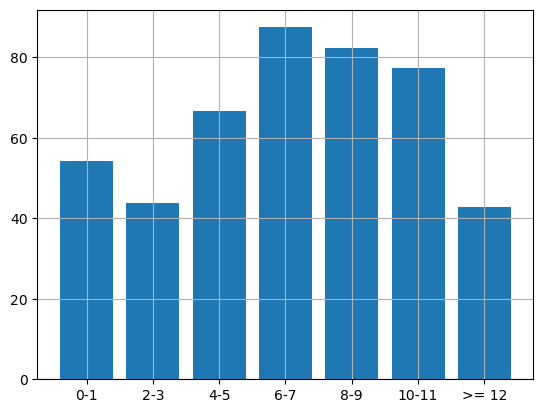

In [44]:
import matplotlib.pyplot as plt
shows = df.loc[df['ReNu']!='NO SHOW', :]
zerotoone = len(shows.loc[(shows['AGE']<2)&(shows['PreV']=='No')&(shows['P5Pe3']=='Yes'),:]) / len(shows.loc[(shows['AGE']<2)&(shows['PreV']=='No'),:]) # 100%
twotothree = len(shows.loc[(shows['AGE']>=2)&(shows['AGE']<4)&(shows['PreV']=='No')&(shows['P5Pe3']=='Yes'),:]) / len(shows.loc[(shows['AGE']>=2)&(shows['AGE']<4)&(shows['PreV']=='No'),:]) # 94%
fourtofive = len(shows.loc[(shows['AGE']>=4)&(shows['AGE']<6)&(shows['PreV']=='No')&(shows['P5Pe3']=='Yes'),:]) / len(shows.loc[(shows['AGE']>=4)&(shows['AGE']<6)&(shows['PreV']=='No'),:]) # 90%
sixtoseven = len(shows.loc[(shows['AGE']>=6)&(shows['AGE']<8)&(shows['PreV']=='No')&(shows['P5Pe3']=='Yes'),:]) / len(shows.loc[(shows['AGE']>=6)&(shows['AGE']<8)&(shows['PreV']=='No'),:]) # 70%
eighttonine = len(shows.loc[(shows['AGE']>=8)&(shows['AGE']<10)&(shows['PreV']=='No')&(shows['P5Pe3']=='Yes'),:])/len(shows.loc[(shows['AGE']>=8)&(shows['AGE']<10)&(shows['PreV']=='No'),:]) # 81%
tentoeleven = len(shows.loc[(shows['AGE']>=10)&(shows['AGE']<12)&(shows['PreV']=='No')&(shows['P5Pe3']=='Yes'),:])/len(shows.loc[(df['AGE']>=10)&(shows['AGE']<12)&(shows['PreV']=='No'),:]) # 88%
twelveandover = len(shows.loc[(df['AGE']>=12)&(shows['PreV']=='No')&(shows['P5Pe3']=='Yes'),:]) / len(shows.loc[(shows['AGE']>=12)&(shows['PreV']=='No'),:]) # 26%
x = ['0-1', '2-3','4-5','6-7','8-9','10-11','>= 12']
y = [zerotoone*100, twotothree*100, fourtofive*100, sixtoseven*100, eighttonine*100, tentoeleven*100, twelveandover*100]
plt.bar(x, y)
plt.grid()
plt.show()

### Percentage that got all doses of OPV by age group

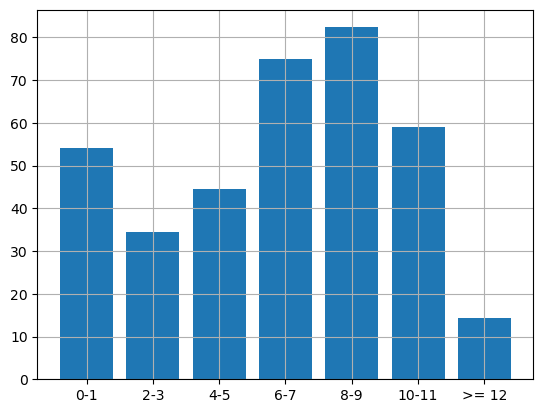

In [45]:
import matplotlib.pyplot as plt
shows = df.loc[df['ReNu']!='NO SHOW', :]
zerotoone = len(shows.loc[(shows['AGE']<2)&(shows['PreV']=='No')&(shows['P5Po3']=='Yes'),:]) / len(shows.loc[(shows['AGE']<2)&(shows['PreV']=='No'),:]) # 100%
twotothree = len(shows.loc[(shows['AGE']>=2)&(shows['AGE']<4)&(shows['PreV']=='No')&(shows['P5Po3']=='Yes'),:]) / len(shows.loc[(shows['AGE']>=2)&(shows['AGE']<4)&(shows['PreV']=='No'),:]) # 94%
fourtofive = len(shows.loc[(shows['AGE']>=4)&(shows['AGE']<6)&(shows['PreV']=='No')&(shows['P5Po3']=='Yes'),:]) / len(shows.loc[(shows['AGE']>=4)&(shows['AGE']<6)&(shows['PreV']=='No'),:]) # 90%
sixtoseven = len(shows.loc[(shows['AGE']>=6)&(shows['AGE']<8)&(shows['PreV']=='No')&(shows['P5Po3']=='Yes'),:]) / len(shows.loc[(shows['AGE']>=6)&(shows['AGE']<8)&(shows['PreV']=='No'),:]) # 70%
eighttonine = len(shows.loc[(shows['AGE']>=8)&(shows['AGE']<10)&(shows['PreV']=='No')&(shows['P5Po3']=='Yes'),:])/len(shows.loc[(shows['AGE']>=8)&(shows['AGE']<10)&(shows['PreV']=='No'),:]) # 81%
tentoeleven = len(shows.loc[(shows['AGE']>=10)&(shows['AGE']<12)&(shows['PreV']=='No')&(shows['P5Po3']=='Yes'),:])/len(shows.loc[(df['AGE']>=10)&(shows['AGE']<12)&(shows['PreV']=='No'),:]) # 88%
twelveandover = len(shows.loc[(df['AGE']>=12)&(shows['PreV']=='No')&(shows['P5Po3']=='Yes'),:]) / len(shows.loc[(shows['AGE']>=12)&(shows['PreV']=='No'),:]) # 26%
x = ['0-1', '2-3','4-5','6-7','8-9','10-11','>= 12']
y = [zerotoone*100, twotothree*100, fourtofive*100, sixtoseven*100, eighttonine*100, tentoeleven*100, twelveandover*100]
plt.bar(x, y)
plt.grid()
plt.show()

In [59]:
df.loc[df['PreV']=='Yes',:]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
44,45,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,Yes,မောင်ဘုန်းမြင့်မြတ်မောင်,M,2022-05-05,...,Yes,No,Yes,Yes,NaN,10.466667,11.466667,12.466667,13.466667,14.466667
46,47,2023-03-15 00:00:00,None,2023-05-15 00:00:00,None,None,Yes,မောင်ဘင်ဂျမင်,M,2022-03-08,...,P,Yes,Yes,Yes,NaN,12.400000,13.400000,14.400000,15.400000,16.400000
51,52,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မအဲလိဇဘက်,F,2021-10-03,...,Yes,Yes,Yes,Yes,NaN,17.600000,18.600000,19.600000,20.600000,21.600000
65,66,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မအယ်နီရှိုင်း,F,2022-03-01,...,Yes,Yes,Yes,Yes,NaN,12.633333,13.633333,14.633333,15.633333,16.633333
67,68,2023-03-15 00:00:00,None,None,None,None,Yes,မောင်လဝန်းကဗျာ,M,2022-08-05,...,P,Yes,Yes,No,NaN,7.400000,8.400000,9.400000,10.400000,11.400000
68,69,2023-03-15 00:00:00,None,2023-05-15 00:00:00,2023-06-15 00:00:00,None,Yes,မောင်အောင်ဆန်းလေး,M,2022-08-24,...,Yes,No,Yes,No,NaN,6.766667,7.766667,8.766667,9.766667,10.766667
70,71,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,Yes,နော်အဂ္ဂနက်,F,2022-02-25,...,Yes,Yes,Yes,Yes,NaN,12.766667,13.766667,14.766667,15.766667,16.766667
72,73,2023-03-15 00:00:00,None,None,None,None,Yes,မောင်အန်ဒြေးယာ,M,2022-05-02,...,No,No,Yes,No,NaN,10.566667,11.566667,12.566667,13.566667,14.566667
81,82,2023-03-15 00:00:00,2023-04-15 00:00:00,None,None,2023-07-15 00:00:00,Yes,မောင်ဂျေရုမ်း,M,2022-09-30,...,P,Yes,Yes,No,NaN,5.533333,6.533333,7.533333,8.533333,9.533333
82,83,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,2023-06-15 00:00:00,2023-07-15 00:00:00,Yes,မရေဂျီးနာ,F,2022-09-07,...,Yes,Yes,Yes,Yes,NaN,6.300000,7.300000,8.300000,9.300000,10.300000


In [60]:
df.to_excel('hi.xlsx')

In [47]:
df2 = df.loc[df['ReNu']!='NO SHOW', :]

In [53]:
df2.loc[(df2['P5Po3']=='No'),:]

,ReNu,Att1,Att2,Att3,Att4,Att5,PreV,Name,Sex,DoB,...,P5Po2,P5Po3,P5M1,P5M2,ReDB,AGE,AGE_APR15,AGE_MAY15,AGE_JUNE15,AGE_JULY15
10,11,2023-03-15 00:00:00,2023-04-15 00:00:00,None,2023-06-15 00:00:00,None,No,မောင်ဒဲနစ်(ကေပိုင်ဆန်း),M,2023-02-10,...,Yes,No,No,No,NaN,1.100000,2.100000,3.100000,4.100000,5.100000
12,13,2023-03-15 00:00:00,2023-04-15 00:00:00,None,2023-06-15 00:00:00,None,No,မဇင်မိုး,F,2022-12-30,...,Yes,No,No,No,NaN,2.500000,3.500000,4.500000,5.500000,6.500000
18,19,2023-03-15 00:00:00,2023-04-15 00:00:00,2023-05-15 00:00:00,None,None,No,မအော်ရီးယာ,F,2022-03-11,...,Yes,No,Yes,Yes,NaN,12.300000,13.300000,14.300000,15.300000,16.300000
31,32,2023-03-15 00:00:00,2023-04-15 00:00:00,None,None,2023-07-15 00:00:00,No,မောင်သြဂုတ်စတင်း,M,2022-08-01,...,Yes,No,Yes,Yes,NaN,7.533333,8.533333,9.533333,10.533333,11.533333
35,36,2023-03-15 00:00:00,None,None,2023-06-15 00:00:00,None,No,မောင်အိန်ဂျယ်ဖြိုး,M,2023-02-18,...,Yes,No,No,No,NaN,0.833333,1.833333,2.833333,3.833333,4.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,178,None,None,None,None,2023-07-15 00:00:00,No,မောင်ဂျက်စတင်း,M,2023-02-17,...,No,No,No,No,NaN,4.933333,1.933333,2.933333,3.933333,4.933333
178,179,None,None,None,None,2023-07-15 00:00:00,No,မောင်ကျော်အောင်နိုင်စိုး,M,2023-04-18,...,No,No,No,No,NaN,2.933333,-0.066667,0.933333,1.933333,2.933333
179,180,None,None,None,None,2023-07-15 00:00:00,No,မဂျူးလိယက်,F,2023-04-13,...,No,No,No,No,NaN,3.100000,0.100000,1.100000,2.100000,3.100000
180,181,None,None,None,None,2023-07-15 00:00:00,No,မောင်ထားရု,M,2023-04-09,...,No,No,No,No,NaN,3.233333,0.233333,1.233333,2.233333,3.233333


In [54]:
74/184

0.40217391304347827